In [32]:
# pip install hydra-core

In [5]:
from io import BytesIO
from minio import Minio
import urllib3
import pandas as pd
from pyspark.sql import SparkSession
from delta import *

import psycopg2
import time
from itertools import product

import numpy as np
from scipy import stats
import os
import re
import ast

import networkx as nx

import seaborn as sns
import plotly.express as px
import plotly

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

import itertools

import statistics as stat

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from shapely.geometry import Polygon

import simpy
import random
import copy
from typing import List, Tuple, Dict

from utils.conection_minio import MinioClient
# from utils.conection_storage import AzureBlobStorage
from utils.conection_postgres import ConexionPostgreSQL

from hydra import initialize, initialize_config_module, initialize_config_dir, compose
import datetime
import json
import multiprocessing

from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import psutil

# Asegúrate de definir o importar las clases y funciones necesarias como Mine, cargadescarga, etc.

from tensorflow.keras.models import load_model
from keras.models import load_model
from keras.initializers import Orthogonal

import warnings

# Suprimir todas las advertencias
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [6]:
## 1. Parte 1, 

import pandas as pd
from io import BytesIO
import json

from random import Random
from time import time
from inspyred import ec
from random import Random
from time import time
import numpy as np
import tensorflow as tf
import time

from minio import Minio  # Cliente de Python para interactuar con el servidor MinIO.
import urllib3   # Biblioteca para realizar peticiones HTTP

# Establecer el número máximo de columnas a mostrar
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [7]:
## Hiperparametro
flota = {
    22:{
        'capacidad_tolva': 230,
        'capacidad_tanque': 750
    },
    50:{
        'capacidad_tolva': 230,
        'capacidad_tanque': 750
    },
}

In [8]:
class FittingDistribution:
    def __init__(self, serie_real:pd.Series()):
        self.serie = serie_real
    def select_distribution(self, method:str()):
        if method == 'Exponencial':
            # Distribucion Exponencial
            self.distribution = stats.expon
        elif method == 'Normal':
            # Distribucion Normal
            self.distribution = stats.norm
        elif method == 'Pareto':  
            # Distribucion Pareto
            self.distribution = stats.pareto
        elif method == 'Logistica':
            # Distribucion Logistica
            self.distribution = stats.logistic
        elif method == 'Gamma':
            # Distribucion Gamma
            self.distribution = stats.gamma
        elif method == 'Weibull':
            # Distribucion Weibull
            self.distribution = stats.weibull_min
        elif method == 'Gama_Generalizada':
            # Distribucion Gamma Generalizada
            self.distribution = stats.gengamma
    def get_params(self):
        self.params = self.distribution.fit(self.serie)
        return self.params
    
    def get_stats(self):
        self.get_params()
        media, var = self.distribution.stats(*self.params, moments='mv')
        desv = np.sqrt(var)
        return media, var, desv
    
    def get_time(self):
        self.get_params()
        serie_simulado = [-1]
        while serie_simulado[0] < 0:
            serie_simulado = self.distribution.rvs(*self.params, size=1)
        return serie_simulado[0]

In [9]:
class TimeFunction:
    def __init__(self, points):
        self.points = points

    def get_time_by_x(self, x):
        if x == self.points[-1][0]:
            return self.points[-1][1]
        
        interval = 0

        for i in range(len(self.points)):
            if self.points[i][0] <= x:
                interval = i
        
        range_interval_x = self.points[interval + 1][0] - self.points[interval][0]
        range_current_x = x - self.points[interval][0]

        range_interval_y = self.points[interval + 1][1] - self.points[interval][1]
        base = self.points[interval][1]

        return base + range_interval_y * (range_current_x / range_interval_x)
    
    def get_random_time(self):
        x = random.uniform(self.points[0][0], self.points[-1][0])
        return self.get_time_by_x(x)
    

def obtain_dict_of_time_functions(fname):
    time_functions_dict = {}

    with open(fname, 'r') as ftiempos:
        lines = ftiempos.readlines()

        # Eliminar espacios al inicio y al final de cada linea
        for i, line in enumerate(lines):
            lines[i] = line.strip()

        # Lines vacias al final
        while not lines[-1]:
            lines.pop()
        
        for line in lines:
            id_function, points = line.split(' ')

            points = points.split('/')

            lst_points = []

            for point in points:
                x, y = point.split(',')
                x = float(x)
                y = float(y)

                lst_points.append((x, y))

            time_functions_dict[id_function] = TimeFunction(lst_points)
    
    return time_functions_dict

In [10]:
## Clases Componentes Mina
### Contenedor general
class Polygon:
    def __init__(self, capacity, data):
        self.capacity = capacity
        self.data = data

        if not self.data:
            self.data = {}

        self.data['id'] = -1
        self.data['idmaterial'] = -1
        self.data['name'] = str()
        self.data['nivel'] = -1
        self.data['geometry'] = list()
        self.data['tiem_creac'] = pd.Timestamp()

    def status(self):
        return "Charging battery"

class Person:
    def __init__(self, capacity, data):
        self.capacity = capacity
        self.data = data

        if not self.data:
            self.data = {}

        self.data['id'] = -1
        self.data['idmaterial'] = -1
        self.data['name'] = str()
        self.data['nivel'] = -1
        self.data['geometry'] = list()
        self.data['tiem_creac'] = pd.Timestamp()

    def status(self):
        return "Charging battery"

class BlockModel:
    def __init__(self, capacity, data):
        self.capacity = capacity
        self.data = data

        if not self.data:
            self.data = {}

        self.data['id'] = -1
        self.data['idmaterial'] = -1
        self.data['name'] = str()
        self.data['nivel'] = -1
        self.data['geometry'] = list()
        self.data['tiem_creac'] = pd.Timestamp()

    def status(self):
        return "Charging battery"

class Container:
    def __init__(self, env:simpy.Environment, capacity, data, working_time=None):
        self.env = env
        self.queque = simpy.Container(env, capacity=capacity)
        self.working_time = working_time
        self.data = data

        if not self.data:
            self.data = {}

        self.data['waiting_time'] = 0
        self.data['using_time'] = 0
        self.data['number_of_server_trucks'] = 0
        self.data['number_of_server_trucks_without_waiting'] = 0
    
    def recharge(self):
        yield env.timeout(TANK_TRUCK_TIME)
        amount = station_tank.capacity - station_tank.level
        station_tank.put(amount)
        print(
            f'{env.now:6.1f} s: Tank truck arrived and refuelled station with {amount:.1f}L'
        )
    def get_time(self):
        if self.working_time == None:
            return 0
        else:
            return self.working_time()

class Storage:
    def __init__(self, env:simpy.Environment, capacity, data, working_time=None):
        self.env = env
        self.queque = simpy.Resource(env, capacity=capacity)
        self.working_time = working_time
        self.data = data

        if not self.data:
            self.data = {}

        self.data['waiting_time'] = 0
        self.data['using_time'] = 0
        self.data['number_of_server_trucks'] = 0
        self.data['number_of_server_trucks_without_waiting'] = 0

    def get_time(self):
        if self.working_time == None:
            return 0
        else:
            return self.working_time()

### Componente carguio: Pala
class Shovel(Storage):
    def work(self, truck, time=None):
        arrival_time = self.env.now

        with self.queque.request() as request:
            yield request

            start_time = self.env.now
            self.data['waiting_time'] += start_time - arrival_time
            self.data['number_of_server_trucks'] +=1
            if arrival_time == start_time:
                self.data['number_of_server_trucks_without_waiting'] += 1
            
            if not time:
                time = self.get_time()

            yield self.env.timeout(time)

            truck.fill_tons()

            finish_time = self.env.now
            self.data['using_time'] += finish_time - start_time
    
    def work_process(self, truck, time=None):
        return self.env.process(self.work(truck, time))
    
    def report(self):
        total_time = self.env.now
        name = self.data['name']
        number_of_server_trucks = self.data['number_of_server_trucks']
        number_of_server_trucks_without_waiting = self.data['number_of_server_trucks_without_waiting']
        
        print(f'REPORTE PALA {name}:')
        print('TIEMPO DE USO EN LA PALA {0}:{1:.3f}'.format(name, self.data['using_time']))
        print('EFICIENCIA DE LA PALA {0}:{1:.3f}%'.format(name, self.data['using_time']/total_time))
        print('TIEMPO DE ESPERA EN LA PALA {0}:{1:.3f}'.format(name, self.data['using_time']))
        print(f'CANTIDAD DE CAMIONES ATENDIDOS:{number_of_server_trucks}')
        print(f'CANTIDAD DE CAMIONES ATENTIDOS SIN ESPERA: {number_of_server_trucks_without_waiting}')
        print('')

### Componente carguio: Cargador
class Loader(Storage):
    def work(self, truck, time=None):
        arrival_time = self.env.now

        with self.queque.request() as request:
            yield request

            start_time = self.env.now
            self.data['waiting_time'] += start_time - arrival_time
            self.data['number_of_server_trucks'] +=1
            if arrival_time == start_time:
                self.data['number_of_server_trucks_without_waiting'] += 1
            
            if not time:
                time = self.get_time()

            yield self.env.timeout(time)

            truck.fill_tons()

            finish_time = self.env.now
            self.data['using_time'] += finish_time - start_time
    
    def work_process(self, truck, time=None):
        return self.env.process(self.work(truck, time))
    
    def report(self):
        total_time = self.env.now
        name = self.data['name']
        number_of_server_trucks = self.data['number_of_server_trucks']
        number_of_server_trucks_without_waiting = self.data['number_of_server_trucks_without_waiting']

        print(f'REPORTE CARGADOR FRONTAL {name}:')
        print('TIEMPO DE USO EN LA CARGADOR FRONTAL {0}:{1:.3f}'.format(name, self.data['using_time']))
        print('EFICIENCIA DE LA CARGADOR FRONTAL {0}:{1:.3f}%'.format(name, self.data['using_time']/total_time))
        print('TIEMPO DE ESPERA EN LA CARGADOR FRONTAL {0}:{1:.3f}'.format(name, self.data['using_time']))
        print(f'CANTIDAD DE CAMIONES ATENDIDOS:{number_of_server_trucks}')
        print(f'CANTIDAD DE CAMIONES ATENTIDOS SIN ESPERA: {number_of_server_trucks_without_waiting}')
        print('')

### Componente destino: Botadero
class Dump(Storage):
    def __init__(self, env: simpy.Environment, capacity, data, working_time=None):
        super().__init__(env, capacity, data, working_time)
        self.data['reserved_tons'] = 0

    def work(self, truck, time=None):
        arrival_time = self.env.now

        with self.queque.request() as request:
            yield request

            start_time = self.env.now
            self.data['waiting_time'] += start_time - arrival_time
            self.data['number_of_server_trucks'] +=1
            if arrival_time == start_time:
                self.data['number_of_server_trucks_without_waiting'] += 1
            
            if not time:
                time = self.get_time()

            yield self.env.timeout(time)

            self.data['reserved_tons'] += truck.get_tons()
            truck.assign_tons(0)

            finish_time = self.env.now
            self.data['using_time'] += finish_time - start_time
    
    def work_process(self, truck, time=None):
        return self.env.process(self.work(truck, time))
    
    def report(self):
        name = self.data['name']
        reserved_tons = self.data['reserved_tons']
        print(f'REPORTE BOTADERO: {name}')
        print(f'DESMONTE (TONELADAS): {reserved_tons}')
        print('')

### Componente camion
class Truck:
    def __init__(self, env:simpy.Environment, capacity_tons, capacity_tanks, data):
        self.env = env
        self.capacity_tons = capacity_tons
        self.tank_fuel = simpy.Container(env, capacity=750, init=capacity_tanks)
        self.material = None
        self.idtrabajador = None
        self.idcamion = None
        self.idcarguio = None
        self.asigcarga = None
        self.asigdescarga = None
        self.data = data

        self.tons = 0
        self.route = None

        self.positions: list[Tuple] = []

    def get_tons(self):
        return self.tons
    
    def assign_tons(self, tons):
        self.tons = tons

    def fill_tons(self):
        self.tons = self.capacity_tons

    def set_route(self, route):
        self.route = route

    def move(self):
        self.report_position()

        while self.route:
            yield self.env.process(self.route(self))
            self.report_position()

    def report_position(self):
        pass

    def add_position(self, tiporuta, id_ciclo: int, id_equip: int, current_time: float, id_ciclo_new: int) -> None:
        self.positions.append((tiporuta, id_ciclo, id_equip, current_time, id_ciclo_new))

In [11]:
### Entorno de trabajo
class Mine:
    def __init__(self, env:simpy.Environment, time_now:pd.Timestamp, cargadescarga:pd.DataFrame(), load_position:pd.DataFrame(), truck_position:pd.DataFrame(), mining_polygons:pd.DataFrame(), delta_short=pd.Timedelta(hours=12), delta_long=pd.Timedelta(days=2)):
        self.env = env
        self.time_now = time_now
        self.cargadescarga = cargadescarga
        self.load_position = load_position
        self.truck_position = truck_position
        self.mining_polygons = mining_polygons
        
        # Rango de memoria del algoritmo (seteo)
        self.delta_short = delta_short
        self.delta_long = delta_long

        self.idacarreo = self.cargadescarga['id_ciclo_acarreo'].iloc[-1]
        
        # self.loaders = dict()
        # for _,row in self.load_position.iterrows():
        #     self.loaders[equipo] = Shovel(env, capacity=1, data={'id':row['idpala'], 'name':row['nombrepala']})
        self.shovel_1 = Shovel(env, capacity=1, data={'id':24, 'name':'PH001'})
        self.shovel_2 = Shovel(env, capacity=1, data={'id':25, 'name':'PH002'})
        self.shovel_3 = Shovel(env, capacity=1, data={'id':26, 'name':'PH003'})
        self.loader_1 = Loader(env, capacity=1, data={'id':27, 'name':'CF001'})
        self.loader_2 = Loader(env, capacity=1, data={'id':163, 'name':'CF002'})

        self.numbers_of_trucks = 0
        self.trucks: List[Truck] = []
        self.dic_trucks: Dict[int,Truck] = {}

    def adjust_time(self):
        print(f'Tiempo de actual: {self.time_now}')
        # Capturamos el tiempo actual y procesamos para encontrar el turno anterior
        if self.time_now.hour > 7:
            self.tiem_start = self.time_now.replace(hour=7, minute=0, second=0, microsecond=0)
        else:
            self.tiem_start = self.time_now.replace(hour=19, minute=0, second=0, microsecond=0)
        print(f'Tiempo de inicio {self.tiem_start}')

    def generate_memory(self):
        self.adjust_time()
        mask_crew = (self.cargadescarga['tiem_llegada_global'] >= self.tiem_start-2*pd.Timedelta(days=1)) & (self.cargadescarga['tiem_llegada_global'] <= self.time_now) & (self.cargadescarga['tiempo_acarreo'].notna()) & (self.cargadescarga['tiempo_viajando'].notna())
        self.crew = self.cargadescarga[mask_crew]['id_trabajador_camion'].unique()

        # Generacion de los rangos actual, memoria corto plazo y largo plazo
        mask_long_term_memory = (self.cargadescarga['tiem_llegada_global'] >= self.tiem_start-1*self.delta_long) & (self.cargadescarga['tiem_llegada_global'] < self.tiem_start) & (self.cargadescarga['tiempo_acarreo'].notna()) & (self.cargadescarga['tiempo_viajando'].notna()) & (self.cargadescarga['id_trabajador_camion'].isin(self.crew))
        mask_short_term_memory = (self.cargadescarga['tiem_llegada_global'] >= self.tiem_start-1*self.delta_short) & (self.cargadescarga['tiem_llegada_global'] < self.tiem_start) & (self.cargadescarga['tiempo_acarreo'].notna()) & (self.cargadescarga['tiempo_viajando'].notna()) & (self.cargadescarga['id_trabajador_camion'].isin(self.crew))
        mask_real = (self.cargadescarga['tiem_llegada_global'] >= self.tiem_start) & (self.cargadescarga['tiem_llegada_global'] <= self.time_now) & (self.cargadescarga['tiempo_acarreo'].notna()) & (self.cargadescarga['tiempo_viajando'].notna()) & (self.cargadescarga['id_trabajador_camion'].isin(self.crew))
        
        self.memory_mind = self.cargadescarga[mask_long_term_memory].copy()
        self.memory_short = self.cargadescarga[mask_short_term_memory].copy()
        self.memory_current = self.cargadescarga[mask_real].copy()

    def generate_timefuncion(self):
        self.generate_memory()
        self.dict_time = dict()
        for carguio in set(self.memory_mind['id_equipo_carguio']):
            mask = self.memory_mind['id_equipo_carguio'] == carguio
            serie_real = self.memory_mind[mask]['tiempo_carga']
        
            distribution = FittingDistribution(serie_real)
            distribution.select_distribution('Normal')
            self.dict_time[carguio] = distribution
        
        for camion in set(self.memory_mind['id_equipo_camion']):
            mask = self.memory_mind['id_equipo_camion'] == camion
            serie_real = self.memory_mind[mask]['tiempo_descarga']
        
            distribution = FittingDistribution(serie_real)
            distribution.select_distribution('Normal')
            self.dict_time[camion] = distribution

    # Logica de tanque de combustible
    def FuelCharge(self, truck:Truck):
        yield self.env.timeout(10)
        amount = truck.tank_fuel.capacity - truck.tank_fuel.level
        truck.tank_fuel.put(amount)
        truck.add_position(3, -1, -1, self.env.now, self.idacarreo)
        return truck

    # Logica de asignacion de rutas
    # Exploracion de ruta cargado
    def SearchLoadRoute(self, truck: Truck):
        # Ciclos locacion carga
        mask = self.memory_mind['id_locacion'].isin(truck.asigcarga)
        ciclos_ruta_cargado = self.memory_mind[mask]
        calculado = ciclos_ruta_cargado.groupby(by=['id_material' , 'id_descarga'], as_index=False).size()

        # Asignacion de locacion descarga
        mask = calculado['id_material'].isin(truck.material)
        truck.asigdescarga = calculado[mask].sample(1)['id_descarga']

        # Busqueda del mejor escenario (Recomendable usar el metodo de construccion de tramo)
        mask = self.memory_mind['id_locacion'].isin(truck.asigcarga) & self.memory_mind['id_descarga'].isin(truck.asigdescarga)
        ciclo_asignado = self.memory_mind[mask].sample(1)

        # Recopilador de informacion
        for _,row in ciclo_asignado.iterrows():
            # print(row['nombre_nodo_carga'], ' -> ', row['nombre_nodo_descarga'])
            self.idacarreo += 1
            truck.add_position(1, row['id_ciclo_acarreo'], row['id_equipo_camion'], self.env.now, self.idacarreo)
            truck.tank_fuel.get(row['Fuel Consumption Cargado'] if row['Fuel Consumption Cargado']>0 else 0.1)
        return ciclo_asignado['tiempo_acarreo'].iloc[0]

    # Exploracion de ruta descargado
    def SearchUnloadRoute(self, truck: Truck):
        # print(truck.tank_fuel.level)
        mask_long = (self.memory_mind['id_descarga'].isin(truck.asigdescarga)) & (self.memory_mind['id_locacion'].isin(self.load_position['idlocacion']))
        ciclos_ruta_descargado = self.memory_mind[mask_long]
        mask = (ciclos_ruta_descargado['id_descarga'].isin(truck.asigdescarga))

        c_coor_descarga = ['coorxdesc', 'coorydesc', 'coorzdesc']
        coor_descarga = ciclos_ruta_descargado[mask][c_coor_descarga].mean()
        
        dist_coor = np.sqrt(pow(self.memory_mind[c_coor_descarga] - coor_descarga, 2).sum(axis=1)).sort_values()

        index = dist_coor.index[0]
        truck.asigdescarga = self.memory_mind.loc[index:index, 'id_descarga']
        mask_short = (self.memory_mind['id_descarga'].isin(truck.asigdescarga)) & (self.memory_mind['id_locacion'].isin(self.load_position['idlocacion']))
        ciclos_ruta_descargado = self.memory_mind[mask_short]

        calculado = ciclos_ruta_descargado.groupby(by=['id_locacion'], as_index=False).size()
        calculado['size'] = calculado['size']/calculado['size'].sum()

        # Asignacion de locacion carga (modificar por logica por tonelaje restante)
        truck.asigcarga = calculado.sample(1, weights='size')['id_locacion']

        mask = (ciclos_ruta_descargado['id_locacion'].isin(truck.asigcarga)) & (ciclos_ruta_descargado['id_descarga'].isin(truck.asigdescarga))
        ciclo_asignado = ciclos_ruta_descargado[mask].sample(1)

        mask = self.load_position['idlocacion'].isin(truck.asigcarga)
        truck.idcarguio = self.load_position[mask]['id_equipo'].iloc[0]
        truck.material = self.load_position[mask]['idmaterial']

        # Recopilador de informacion
        for _,row in ciclo_asignado.iterrows():
            # print(row['nombre_nodo_descarga'], ' -> ', row['nombre_nodo_carga_vuelta'])
            self.idacarreo += 1
            truck.add_position(2, row['id_ciclo_acarreo'], row['id_equipo_camion'], self.env.now, self.idacarreo)
            truck.tank_fuel.get(row['Fuel Consumption Vacio'] if row['Fuel Consumption Vacio']>0 else 0.1)
        return ciclo_asignado['tiempo_viajando'].iloc[0]

    def get_timeout(self, id_equipo):
        return self.env.timeout(self.dict_time[id_equipo].get_time())
    
    # Logica de generacion de ciclos
    def loading(self, truck: Truck):
        # print('Loading')
        # print(f' - Camion {truck.idcamion} : {self.env.now} -> En la Zona de Carga {truck.asigcarga.iloc[0]}')
        yield self.get_timeout(truck.idcarguio)
        if truck.tank_fuel.level < 225 :
            yield self.env.process(self.FuelCharge(truck))
        truck.set_route(self.route_load)
    
    def route_load(self, truck: Truck):
        # print('Route Load')
        # print(f' - Camion {truck.idcamion} : {self.env.now} -> Parte de Zona de Carga {truck.asigcarga.iloc[0]}')
        tiempo_cargado = self.SearchLoadRoute(truck)
        yield self.env.timeout(tiempo_cargado)
        # print(f' - Camion {truck.idcamion} : {self.env.now} -> Se dirige a Zona de Descarga {truck.asigdescarga.iloc[0]}')
        truck.set_route(self.unloading)

    def unloading(self, truck: Truck):
        # print('Unloading')
        # print(f' - Camion {truck.idcamion} : {self.env.now} -> En la Zona de Descarga {truck.asigdescarga.iloc[0]}')
        yield self.get_timeout(truck.idcamion)
        if truck.tank_fuel.level < 225 :
            yield self.env.process(self.FuelCharge(truck))
        truck.set_route(self.route_unload)
    
    def route_unload(self, truck: Truck):
        # print('Route Unload')
        # print(f' - Camion {truck.idcamion} : {self.env.now} -> Parte de Zona de Descarga {truck.asigdescarga.iloc[0]}')
        tiempo_descargado = self.SearchUnloadRoute(truck)
        yield self.env.timeout(tiempo_descargado)
        # print(f' - Camion {truck.idcamion} : {self.env.now} -> Se dirige a Zona de Carga {truck.asigcarga.iloc[0]}')
        # yield self.env.timeout(10)
        truck.set_route(self.loading)
    
    # Iniciador de camiones
    def status_initial(self):
        # Encontramos la pala asignada al camion
        pala_asiganado = current_camion['idpala']
        
        mask = self.load_position['idpala'].isin(pala_asiganado)
        locacioncarga = self.load_position[mask]['idlocacion']
        poligonocarga = self.load_position[mask]['idpoligono']
        materialcarga = self.load_position[mask]['idmaterial']
        # Poligono minado
        mask = self.mining_polygons['id'].isin(poligonocarga)
        poligono_asignado = self.mining_polygons[mask]

    def start_truck(self, truck):
        # Ruta inicial: Debemos configurar para la ruta actual(Real-Time)
        if truck.data['proceso'] == 1:
            # Proceso Posicionamiento
            # print('Proceso - 1')
            truck.data['proceso']
            truck.set_route(self.loading)
        elif truck.data['proceso'] == 2:
            # Proceso Carga
            # print('Proceso - 2')
            truck.set_route(self.loading)
        elif truck.data['proceso'] == 3:
            # Proceso RutaCargado
            # print('Proceso - 3')
            truck.set_route(self.route_load)
        elif truck.data['proceso'] == 4:
            # Proceso Descarga
            # print('Proceso - 4')
            truck.set_route(self.unloading)
        else:
            # Proceso RutaDescargado
            # print('Proceso - 5')
            truck.set_route(self.route_unload)

        # Iniciamos la simulacion
        self.env.process(truck.move())
        
    def generate_trucks(self):
        data = dict()
        for _,row in self.truck_position.iterrows():
            # print('-'*50)
            # print(f'Equipo: {row['idcamion']}')
            # print('-'*50)
            # Equipo
            data['id'] = row['idcamion']
            data['name'] = row['nombrecamion']
            data['flota'] = row['idflota']
            data['estado'] = row['idestadopricipal']
            data['estadodetalle'] = row['nombreestadoactual']
            data['proceso'] = row['proceso']
            # Caracteristicas
            data['ancho'] = row['ancho']
            data['largo'] = row['largo']
            data['flota'] = row['idflota']
            # Operador
            data['operador'] = row['idtrabajador']
            # data['guardia'] = row['id_operador1'] (guardia)
            # Carga
            data['material'] = row['id_material']
            # Algoritmo
            asigcarga = row['idlocacion1']
            asigdescarga = row['id2descarga']
            capacity_tons = row['capacidadpeso1']
            capacity_tank = (row['porc_actual'] if row['porc_actual']>=0 else 50)*750/100 # Parametrizar esta parte
            # print(asigcarga, asigdescarga)
            truck = Truck(self.env, capacity_tons, capacity_tank, data)
            truck.idcamion = row['idcamion']
            truck.idcarguio = row['idpala']
            self.idtrabajador = row['idtrabajador']
            truck.asigcarga = pd.Series([row['idlocacion1']])
            truck.asigdescarga = pd.Series([row['iddescarga']])
            truck.material = [row['id_material']]
            # self.trucks.append(truck)
            self.dic_trucks[row['idcamion']] = truck
            self.start_truck(truck)
            yield self.env.timeout(0)

    def start_simulation(self):
        # Evaluar camiones por flota
        self.generate_timefuncion()
        self.env.process(self.generate_trucks())

In [12]:
if __name__ == "__main__":
    # Cargando la configuracion
    with initialize(version_base=None, config_path="conf"):
        cfg=compose(overrides= ["+db=postgres", "+storage=minio"])

    # Conectar al servidor de AzureStorage
    storage = MinioClient(**cfg.storage)

    # Crear una instancia de la clase
    db = ConexionPostgreSQL(**cfg.db)

    # Ejecutar una consulta
    with open('./query/posicionpala.sql', 'r') as file:
        queryposicionpala = file.read()

    posicion_pala = db.ejecutar_consulta(queryposicionpala, None)

    # Ejecutar una consulta
    with open('./query/posicioncamion.sql', 'r') as file:
        queryposicioncamion = file.read()

    posicion_camion = db.ejecutar_consulta(queryposicioncamion, None)
    
    # Ejecutar una consulta
    with open('./query/arreglonodos.sql', 'r') as file:
        queryarreglonodos = file.read()

    mapa_nodo = db.ejecutar_consulta(queryarreglonodos, None)

    # Ejecutar una consulta
    with open('./query/arreglotramos.sql', 'r') as file:
        queryarreglotramos = file.read()
    
    mapa_tramo = db.ejecutar_consulta(queryarreglotramos, None)

    # Ejecutar una consulta
    with open('./query/locacioncarga.sql', 'r') as file:
        querylocacioncarga = file.read()

    mapa_punto_carga = db.ejecutar_consulta(querylocacioncarga, None)

    # Ejecutar una consulta
    with open('./query/locaciondescarga.sql', 'r') as file:
        querylocaciondescarga = file.read()

    mapa_punto_descarga = db.ejecutar_consulta(querylocaciondescarga, None)

    # Ejecutar una consulta
    with open('./query/poligonos.sql', 'r') as file:
        querypoligonos = file.read()

    poligono_minado = db.ejecutar_consulta(querypoligonos, None)

    # Ejecutar una consulta
    consulta = '''
        SELECT
            t2.id_equipo, MAX(t2.tiem_creac)
        FROM public.ta_datacamion AS t2
        GROUP BY t2.id_equipo;
    '''

    ultima_fecha = db.ejecutar_consulta(consulta, None)

    container_name = 'sanmartinpresentation'
    folder_name = '/proyectocombustible_presentation/ModeloPredictivo/fuentedatos_modelopredictivo/'
    object_name = 'table_cargadescarga.parquet'
    cargadescarga = storage.get_object(container_name, folder_name+object_name, 'parquet')
    cargadescarga = cargadescarga.sort_values('tiem_llegada_global', ignore_index=True)

    # folder_name = 'proyectocombustible_presentation/ModeloPredictivo/fuentedatos_modelopredictivo/datacamion/'
    # object_name = 'table_delta_28.parquet'
    # datacamion = storage.get_object(container_name, folder_name+object_name, 'parquet')
    # datacamion = datacamion.sort_values('instant_date_t', ignore_index=True)

    # folder_name = 'proyectocombustible_presentation/ModeloPredictivo/fuentedatos_modelopredictivo/datacamion/'
    # object_name = 'table_delta_29.parquet'
    # datacamion_2 = storage.get_object(container_name, folder_name+object_name, 'parquet')
    # datacamion_2 = datacamion_2.sort_values('instant_date_t', ignore_index=True)

    # container_name = 'processed'
    # folder_name = 'proyectocombustible_processed/ModeloPredictivo/modelopredictivo/'
    # object_name = 'nombres_columnas_lstm.parquet'
    # columna_predictivo = storage.get_object(container_name, folder_name+object_name, 'parquet')

    # Cerrar la conexión
    db.cerrar_conexion()

Tiempo de ejecución: 5.580397844314575 segundos
Tiempo de ejecución: 0.41423821449279785 segundos
Tiempo de ejecución: 0.028847694396972656 segundos
Tiempo de ejecución: 0.058161020278930664 segundos
Tiempo de ejecución: 0.007584810256958008 segundos
Tiempo de ejecución: 0.010935068130493164 segundos
Tiempo de ejecución: 0.06641316413879395 segundos
Tiempo de ejecución: 0.00505375862121582 segundos
Conexión cerrada


In [13]:
_help = ~np.isnan(posicion_camion[['tiemllegadaciclo',
       'tiemcuadraciclo', 'tiemcuadradociclo', 'tiemcargaciclo',
       'tiemacarreociclo', 'tiemcolaciclo', 'tiemretrociclo',
       'tiemdescargaciclo', 'tiemviajandociclo']])

posicion_camion['help'] = _help.sum(axis=1)
posicion_camion['proceso'] = 0

mask = (posicion_camion['help'] >= 0) & (posicion_camion['help'] < 4)
posicion_camion.loc[mask, 'proceso'] = 1 # Proceso Posicionamiento
mask = (posicion_camion['help'] >= 4) & (posicion_camion['help'] < 5)
posicion_camion.loc[mask, 'proceso'] = 2 # Proceso Carga
mask = (posicion_camion['help'] >= 5) & (posicion_camion['help'] < 8) 
posicion_camion.loc[mask, 'proceso'] = 3 # Proceso RutaCargado
mask = (posicion_camion['help'] >= 8) & (posicion_camion['help'] < 9) 
posicion_camion.loc[mask, 'proceso'] = 4 # Proceso Descarga
mask = (posicion_camion['help'] >= 9)
posicion_camion.loc[mask, 'proceso'] = 5 # Proceso RutaDescargado

In [14]:
# lst_equipo = [28,29,30,31,32,33,35,36,37,38,39,41,42,43,44,45,49,183,186,189,190]
mask_flota = posicion_camion['idflota'].isin([27,100])
lst_equipo = set(posicion_camion[mask_flota]['idcamion'])
mask = cargadescarga['id_equipo_camion'].isin(lst_equipo)
cargadescarga = cargadescarga[mask]

mask = posicion_camion['idcamion'].isin(lst_equipo)
posicion_camion = posicion_camion[mask]

mask = posicion_camion['idcamion'] == 28
specific_camion = posicion_camion[mask] 

In [15]:
mask = cargadescarga['tiempo_viajando'] > 240
cargadescarga = cargadescarga[mask]

In [16]:
lst_equipo = [74, 78, 103, 106]

In [17]:
container_name = 'sanmartinpresentation'
folder_name = '/proyectocombustible_presentation/ModeloPredictivo/fuentedatos_modelopredictivo/datacamion/'
id_ciclo_max = 1
dic_equipo = dict()
for equipo in set(lst_equipo):
    object_name = f'table_delta_{equipo}.parquet'
    datacamion = storage.get_object(container_name, folder_name+object_name, 'parquet')
    datacamion = datacamion.sort_values('instant_date_t', ignore_index=True)
    if id_ciclo_max < datacamion['id_ciclo'].max():
        id_ciclo_max = datacamion['id_ciclo'].max()
    datacamion.columns = datacamion.columns.str.strip().str.lower()
    dic_equipo[equipo] = datacamion

In [18]:
nom_flota = '777f'

### Algoritmo de Simulacion

#### Variables de entrada
##### Parametros:
- tiem_now
- data historic
- cargadescarga (fijo)
- datacamion (seleccionable)
- data real time
- posicion_pala
- posicion_camion
- poligono_minado
##### Hiperparametros
- delta_short
- delta_long

##### Locacion Carga
* posicion_camion
    - Pala: locacion -> idlocacion1 **
    - Locacion 1: locacion -> id_locacion (Normalidad)
    - Locacion 2: locacion -> idlocacion2 (Especial)
    - Descarga: 
* posicion_pala
    - Pala: idlocacion -> id (principal)
* cargadescarga
    - Pala: id_locacion -> id (principal)
##### Locacion Descarga
* posicion_camion
    - Descarga: iddescarga
* cargadescarga
    - Descarga: id_descarga

## Integracion de Simulador & Modelo Predictivo

In [19]:
### Codigo unificado
NUMBER_RETROCESO = 0
NUMBER_CASE = 1

container_name = 'presentation'

folder_name_real = 'proyectocombustible_presentation/CapaReal/datacamion/'
folder_name_forecast = 'proyectocombustible_presentation/ModeloDinamico/datacamion/'
folder_name_recomend = 'proyectocombustible_presentation/ModeloRecomendacion/datacamion/'
folder_name_escenario = 'proyectocombustible_presentation/ModeloDinamico/escenarios/'

c_constant = [
    'equipment',
    'nombre',
]

# columna_recomendacion = [
#     'roll',
#     'intake manifold pressure',
#     'intake manifold #2 pressure',
#     'engine speed',
#     'actual gear',
#     'x',
#     'y',
#     'z',
#     'efhcargado',
#     'efhvacio',                               
#     'distancia_ruta_pendiente_grados',
#     'ambient air temperature',
#     'brake pump pressure',
#     'fuel consumption rate(lag1)', 
#     'fuel consumption rate(target)'
# ]

c_time = 'instant_date_t'
c_tarjet = 'fuel consumption rate'

## Cargar modelo predictivo
modelo = load_model('./models/modelo_lstm_14_4pasos_777f.h5')

# Leer los JSON de mínimos y máximos
with open("./json/minimos_lstm_13_var_4pasos_777f.json", "r") as file:
    minimos = json.load(file)
 
with open("./json/maximos_lstm_13_var_4pasos_777f.json", "r") as file:
    maximos = json.load(file)   # Función para normalizar el nuevo DataFrame

In [20]:
columna_predictivo = pd.read_parquet('./models/columnas_14var_4pasos_777f.parquet').set_index(['columnas']).T

In [17]:
# minimos

In [21]:
columna_predictivo

columnas,roll,pitch,ground speed,tonelaje_t,gear,x,y,z,efhcargado,efhvacio,atmospheric pressure,brake pump pressure,fuel consumption rate


In [22]:
def preprocesing_use_model(data, n_steps, col_pred):

    def normalizar_por_variables_manual(dataframe, variables_a_normalizar, minimos, maximos):
        dataframe_normalizado = dataframe.copy()
        for columna in variables_a_normalizar:
            if columna in minimos and columna in maximos:  # Asegurarse de que la columna esté en los diccionarios
                dataframe_normalizado[columna] = (dataframe[columna] - minimos[columna]) / (maximos[columna] - minimos[columna])
        return dataframe_normalizado   # Variables a normalizar (excluyendo la última columna)

    def add_lags(dataframe, pasos_adelante=1, pasos_atras=1):
        # Crear pasos hacia adelante según el número de pasos futuros deseado
        for i in range(1, pasos_adelante + 1):
            dataframe[c_tarjet+f'(t+{i})'] = dataframe[c_tarjet].shift(-i)  # Shift hacia adelante
        
        # Crear pasos hacia atrás según el número de pasos deseado
        for j in range(1, pasos_atras + 1):
            dataframe[c_tarjet+f'(t-{j})'] = dataframe[c_tarjet].shift(j)  # Shift hacia atrás
        return dataframe
    # Pronostico del consumo de combustible
    ## Diagnostico de consumo de combustible
    data = data.fillna(0)
    data = data.set_index(c_time)
    tiem_start = data.index.min() + (n_steps) * frequency
    data.loc[tiem_start:,c_tarjet] = np.nan

    ## Variables de entrada
    data_columna = data[col_pred.columns.str.strip().str.lower()]

    # Seleccionar todas las columnas excepto la variable objetivo
    data_x = data_columna.drop(columns=[c_tarjet])
    data_y = data_columna[c_tarjet]
    col_xpred = data_x.columns

    # Escalar solo las variables especificadas en el dataframe train
    data_escalada = normalizar_por_variables_manual(data_x, col_xpred, minimos, maximos)    

    #Agregamos la data_y a nuestro datos escalados previamente
    data_escalada[c_tarjet] = data_y

    # Verifica el resultado
    # Llamar a la función para agregar el lag y obtener el nuevo DataFrame
    data_escalada = add_lags(data_escalada, pasos_adelante=0, pasos_atras=1)

    #### Renombrar las columnas del df
    # Renombrar columnas específicas
    data_escalada = data_escalada.rename(columns={
        c_tarjet: c_tarjet+'(target)',
        c_tarjet+'(t-1)': c_tarjet+'(lag1)'
        })
    
    return data_escalada

In [23]:
def preprocesing_use_model_recomend(data, col_pred):

    def normalizar_por_variables_manual(dataframe, variables_a_normalizar, minimos, maximos):
        dataframe_normalizado = dataframe.copy()
        for columna in variables_a_normalizar:
            if columna in minimos and columna in maximos:  # Asegurarse de que la columna esté en los diccionarios
                dataframe_normalizado[columna] = (dataframe[columna] - minimos[columna]) / (maximos[columna] - minimos[columna])
        return dataframe_normalizado   # Variables a normalizar (excluyendo la última columna)

    def add_lags(dataframe, pasos_adelante=1, pasos_atras=1):
        # Crear pasos hacia adelante según el número de pasos futuros deseado
        for i in range(1, pasos_adelante + 1):
            dataframe[c_tarjet+f'(t+{i})'] = dataframe[c_tarjet].shift(-i)  # Shift hacia adelante
        
        # Crear pasos hacia atrás según el número de pasos deseado
        for j in range(1, pasos_atras + 1):
            dataframe[c_tarjet+f'(t-{j})'] = dataframe[c_tarjet].shift(j)  # Shift hacia atrás
        return dataframe
    # Pronostico del consumo de combustible
    ## Diagnostico de consumo de combustible
    data = data.set_index(c_time)
    tiem_start = data.index.min() + (NUMBER_RETROCESO+1) * frequency

    ## Variables de entrada
    data_columna = data[col_pred.columns.str.strip().str.lower()]

    # Seleccionar todas las columnas excepto la variable objetivo
    data_x = data_columna.drop(columns=[c_tarjet])
    data_y = data_columna[c_tarjet]
    col_xpred = data_x.columns

    # Escalar solo las variables especificadas en el dataframe train
    data_escalada = normalizar_por_variables_manual(data_x, col_xpred, minimos, maximos)    

    #Agregamos la data_y a nuestro datos escalados previamente
    data_escalada[c_tarjet] = data_y

    # Verifica el resultado
    # Llamar a la función para agregar el lag y obtener el nuevo DataFrame
    data_escalada = add_lags(data_escalada, pasos_adelante=1, pasos_atras=0)

    #### Renombrar las columnas del df
    # Renombrar columnas específicas
    data_escalada = data_escalada.rename(columns={
        c_tarjet: c_tarjet+'(lag1)',
        c_tarjet+'(t+1)': c_tarjet+'(target)'
        })
    
    return data_escalada

In [24]:
def completar_nan_con_predicciones(dataframe, model, input_length, target):
    # Iterar sobre cada fila de dataframe
    for i in range(input_length, len(dataframe)):
        # Verifica si el valor de la columna objetivo es NaN
        if np.isnan(dataframe[target].iloc[i]):
            # Prepara la entrada para la predicción
            # Obtiene las últimas 'input_length' filas para la predicción
            input_data = dataframe.iloc[i - input_length:i].drop(columns=[target]).values
            input_data = np.reshape(input_data, (1, input_length, input_data.shape[1]))  # Reshape para el modelo LSTM

            # Realiza la predicción
            prediccion = model.predict(input_data)

            # Completa el valor de la columna objetivo
            dataframe[target].iloc[i] = prediccion[0][0]  # Asumiendo que la salida es un solo valor

            # Completar Fuel Consumption Rate(lag1) si es NaN
            if np.isnan(dataframe[c_tarjet+'(lag1)'].iloc[i]):
                dataframe[c_tarjet+'(lag1)'].iloc[i] = dataframe[target].iloc[i - 1]

    return dataframe

In [25]:
def completar_nan_con_predicciones_all(dataframe, model, target):
    """
    Completa los valores NaN de la columna 'fuel consumption rate(target)' utilizando un modelo LSTM
    con entrada (1,1,14). La predicción se realiza fila por fila, utilizando 'fuel consumption rate(lag1)'
    como retroalimentación para la siguiente predicción.
 
    Args:
        dataframe (pd.DataFrame): El DataFrame con los datos.
        model (tf.keras.Model): El modelo LSTM entrenado.
        target (str): El nombre de la columna objetivo que debe completarse.
 
    Returns:
        pd.DataFrame: El DataFrame con los valores completados.
    """
    # Asegúrate de no modificar el DataFrame original
    dataframe = dataframe.copy()
 
    # Itera sobre el DataFrame comenzando desde la segunda fila, ya que la primera no tiene valor para 'lag1'
    for i in range(0, len(dataframe)):  #  0 :  si Lstm entreno con 1 fila, 1 :  si Lstm entreno con 2 fila, 2 :  si Lstm entreno con 3 fila, etc
        if np.isnan(dataframe.iloc[i][target]):  # Si el valor es NaN, predecir
            # Selecciona todas las columnas, excepto el target (fuel consumption rate(target))
            input_data = dataframe.iloc[i].drop(labels=[target]).values
            input_data = np.reshape(input_data, (1, 1, input_data.shape[0]))  # Reshape para la entrada del modelo LSTM
 
            # Realiza la predicción
            prediccion = model.predict(input_data)
 
            # Asigna el valor de la predicción a la columna target
            dataframe.iloc[i, dataframe.columns.get_loc(target)] = prediccion[0][0]
 
            # Actualiza el valor de 'fuel consumption rate(lag1)' en la siguiente fila
            if i + 1 < len(dataframe):
                dataframe.iloc[i + 1, dataframe.columns.get_loc(c_tarjet+'(lag1)')] = prediccion[0][0]
 
    return dataframe

In [26]:
def completar_nan_con_predicciones_multivf(df, model, n_steps, target):
    """
    Completa los valores NaN de la columna objetivo utilizando un modelo LSTM entrenado con múltiples filas.

    Args:
        df (pd.DataFrame): El DataFrame con los datos.
        model (tf.keras.Model): El modelo LSTM entrenado.
        n_steps (int): Número de filas usadas como entrada para el modelo LSTM.
        target_column (str): El nombre de la columna objetivo que debe completarse.
        lag_column (str): El nombre de la columna lag que debe actualizarse.

    Returns:
        pd.DataFrame: El DataFrame con los valores completados.
    """
    # Asegúrate de no modificar el DataFrame original
    df = df.copy()

    target_column = target+'(target)'
    lag_column = target+'(lag1)'

    for i in range(n_steps, len(df)):
        # Selecciona las filas de entrada para el modelo (las `n_steps` anteriores a la fila actual)
        input_rows = df.iloc[i - n_steps:i + 1]  # Rango de filas: [i-n_steps+1, i]

        # Elimina la columna objetivo para usar solo las características
        input_rows = input_rows.drop(columns=[target_column])

        # Convierte a array
        input_array = input_rows.values

        # Reshape para la entrada del modelo LSTM
        input_data = np.reshape(input_array, (1, n_steps + 1, input_array.shape[1]))

        # Realiza la predicción
        prediccion = model.predict(input_data)

        # Asigna el valor de la predicción a la fila actual
        df.iloc[i, df.columns.get_loc(target_column)] = prediccion[0][0]

        # Actualiza el valor de 'lag_column' en la fila siguiente
        if i + 1 < len(df):
            df.iloc[i + 1, df.columns.get_loc(lag_column)] = prediccion[0][0]

    return df

In [27]:
def GenerarHistorico(equipo, dataset):
    dataset = dataset.tail(1000).reset_index(drop=True)
    dataset['Tipo'] = 'Real'

    # object_name = str(equipo) + f'/{hora_actual}_Caso_Historico.parquet'
    # storage.put_object(container_name, folder_name_real+object_name, dataset, 'parquet')
    return (equipo, dataset)

In [28]:
def GenerarEscenario(num_case, tiem_now, cargadescarga, load_position, truck_position, mining_polygons):
    # Lógica de generación de casos
    print('-'*100)
    print(f'Ejecucion caso - {num_case}')
    print('-'*100)
    delta_short = pd.Timedelta(hours=12)
    delta_long = pd.Timedelta(days=7)
    env = simpy.Environment()
    mine = Mine(env, tiem_now, cargadescarga, load_position, truck_position, mining_polygons, delta_short, delta_long)
    mine.start_simulation()
    total_time = 60*60*12
    env.run(until=total_time)

    # # Guardar el objeto mine en Azure Blob Storage
    # container_name = 'presentation'
    # folder_name = 'proyectocombustible_presentation/ModeloDinamico/escenarios/'
    # object_name = str(equipo) + f'/{hora_actual}_Caso_{num_case}.pkl'
    # storage.put_object(container_name, folder_name + object_name, mine, 'pickle')

    return (num_case, mine)

In [29]:
def GenerarPrediccion(equipo, escenario, num_case, dic_equipo):
    path_modelo = f'./models/modelo_lstm_{equipo}.h5'
    path_modelo = f'./models/modelo_lstm_14_4pasos.h5'
    modelo = load_model(path_modelo)
    c_reporte = ['estado', 'id_ciclo', 'id_equipo', 'tiempo', 'id_ciclo_new']
    dataset_reporte = pd.DataFrame(escenario.positions, columns=c_reporte)

    data_camion = dic_equipo[equipo]
    data_camion = data_camion.tail(1000).reset_index(drop=True)
    data_camion['Tipo'] = 'Real'

    time_current = data_camion[c_time].max()
    dataset_forecast = pd.DataFrame()

    total_worker = posicion_camion['idtrabajador']
    mask = posicion_camion['idcamion'] == equipo
    idtrabajador = posicion_camion.loc[mask, 'idtrabajador'].iloc[0]
    tank_fuel = posicion_camion.loc[mask, 'porc_actual'].iloc[0]

    # Generacion de dataset (Caso)
    for caso in escenario.positions:
        estado_equipo = caso[0]
        id_ciclo = caso[1]
        id_equipo = caso[2]
        id_ciclo_new = caso[4]
        if estado_equipo == 1:
            datacamion = dic_equipo[id_equipo].copy()
            mask = (datacamion['ruta_cargado']>0) & (datacamion['id_ciclo'] == id_ciclo)
            ciclocamion = datacamion[mask].copy()
            ciclocamion['id_ciclo'] = id_ciclo_new
            # ciclocamion['tank fuel level'] = (tank_fuel - ciclocamion['fuel consumption'].cumsum()/750*100)
            # tank_fuel = ciclocamion['tank fuel level'].iloc[-1]
        elif estado_equipo == 2:
            datacamion = dic_equipo[id_equipo]
            mask = (datacamion['ruta_descargado']>0) & (datacamion['id_ciclo'] == id_ciclo)
            ciclocamion = datacamion[mask].copy()
            ciclocamion['id_ciclo'] = id_ciclo_new
            # ciclocamion['tank fuel level'] = (tank_fuel - ciclocamion['fuel consumption'].cumsum()/750*100)
            # tank_fuel = ciclocamion['tank fuel level'].iloc[-1]
        else:
            # tank_fuel = 98
            print('Error: No se identifica el estado')
        
        ciclocamion[c_time] = pd.NaT
        dataset_forecast = pd.concat([dataset_forecast, ciclocamion])
    
    # Acondicionamiento de datos para pronosticar
    dataset_forecast[c_time] = pd.date_range(str(time_current), str(time_current+frequency*(len(dataset_forecast)-1)), freq='2T')
    dataset_forecast = pd.concat([data_camion.tail(NUMBER_RETROCESO), dataset_forecast], ignore_index=True)
    dataset_forecast = dataset_forecast.sort_values(c_time)

    # Integracion modelo dinamico con modelo predictivo
    dataset_modelo = preprocesing_use_model(dataset_forecast, NUMBER_RETROCESO, columna_predictivo)
    dataset_modelo = completar_nan_con_predicciones_all(dataset_modelo, modelo, c_tarjet+'(target)').reset_index()
    dataset_forecast = dataset_forecast.iloc[NUMBER_RETROCESO+1:,:].reset_index(drop=True)
    dataset_forecast = dataset_forecast.sort_values(c_time)
    
    # Ajuste de datos
    dataset_forecast[c_tarjet+'(target)'] = dataset_modelo[c_tarjet+'(target)']
    dataset_forecast[c_tarjet+'(lag1)'] = dataset_modelo[c_tarjet+'(lag1)']
    dataset_forecast['fuel consumption'] = dataset_forecast[c_tarjet+'(target)'] * (1/30)

    cambio_operador = False
    for ciclo in dataset_forecast['id_ciclo'].drop_duplicates().values:
        # Correccion de tanque de combustible
        mask = dataset_forecast['id_ciclo'] == ciclo
        ciclocamion = dataset_forecast[mask]
        dataset_forecast.loc[mask, 'tank fuel level'] = (tank_fuel - ((dataset_forecast.loc[mask, 'fuel consumption'].cumsum()/(3.752*750))*100))
        tank_fuel = dataset_forecast.loc[mask, 'tank fuel level'].iloc[-1]
        if tank_fuel<20:
            tank_fuel=98
        # Correccion de idtrabajador
        tiem_fin = dataset_forecast.loc[mask, c_time].iloc[-1]
        if (tiem_fin.hour>12) & (tiem_fin.hour<17) & ~(cambio_operador):
            print('Hora de almuerzo')
            cambio_operador = True
            mask_work = total_worker != idtrabajador
            select_worker = total_worker[mask_work].sample(1)
            idtrabajador = select_worker.iloc[0]
            total_worker = total_worker.drop(index=select_worker.index)
        dataset_forecast.loc[mask, 'id_trabaj_t'] = idtrabajador

    for columna in c_constant:
        dataset_forecast.loc[:,columna] = data_camion.loc[data_camion.shape[0]-1,columna]
    dataset_forecast['year'] = dataset_forecast[c_time].dt.year
    dataset_forecast['mes'] = dataset_forecast[c_time].dt.month
    dataset_forecast['dia'] = dataset_forecast[c_time].dt.day
    dataset_forecast['hora'] = dataset_forecast[c_time].dt.hour
    dataset_forecast['minuto'] = dataset_forecast[c_time].dt.minute

    dataset_forecast['Tipo'] = 'Prediccion'

    dataset_forecast = dataset_forecast.drop(columns=[c_tarjet])
    dataset_forecast = pd.concat([data_camion.tail(NUMBER_RETROCESO), dataset_forecast], ignore_index=True)
    # dataset_forecast = dataset_forecast.rename(columns={c_tarjet+'(target)':c_tarjet})

    # object_name = str(equipo) + f'/{hora_actual}_Caso_{num_case}.parquet'
    # storage.put_object(container_name, folder_name_forecast+object_name, dataset_forecast, 'parquet')

    return (equipo, dataset_forecast)

In [30]:
def BuildingEscenario(equipo, escenario, num_case, dic_equipo):
    frequency = pd.Timedelta(2, 'minutes')
    c_reporte = ['estado', 'id_ciclo', 'id_equipo', 'tiempo', 'id_ciclo_new']
    dataset_reporte = pd.DataFrame(escenario.positions, columns=c_reporte)

    data_camion = dic_equipo[equipo]
    data_camion = data_camion.tail(1000).reset_index(drop=True)
    data_camion['Tipo'] = 'Real'

    time_current = data_camion[c_time].max()
    time_current = time_current + frequency
    dataset_forecast = pd.DataFrame()

    # Generacion de dataset (Caso)
    for caso in escenario.positions:
        estado_equipo = caso[0]
        id_ciclo = caso[1]
        id_equipo = caso[2]
        id_ciclo_new = caso[4]
        if estado_equipo == 1:
            datacamion = dic_equipo[id_equipo].copy()
            mask = (datacamion['ruta_cargado']>0) & (datacamion['id_ciclo'] == id_ciclo)
            ciclocamion = datacamion[mask].copy()
            ciclocamion['id_ciclo'] = id_ciclo_new
            # ciclocamion['tank fuel level'] = (tank_fuel - ciclocamion['fuel consumption'].cumsum()/750*100)
            # tank_fuel = ciclocamion['tank fuel level'].iloc[-1]
        elif estado_equipo == 2:
            datacamion = dic_equipo[id_equipo]
            mask = (datacamion['ruta_descargado']>0) & (datacamion['id_ciclo'] == id_ciclo)
            ciclocamion = datacamion[mask].copy()
            ciclocamion['id_ciclo'] = id_ciclo_new
            # ciclocamion['tank fuel level'] = (tank_fuel - ciclocamion['fuel consumption'].cumsum()/750*100)
            # tank_fuel = ciclocamion['tank fuel level'].iloc[-1]
        else:
            # tank_fuel = 98
            print('Error: No se identifica el estado')
        
        ciclocamion[c_time] = pd.NaT
        dataset_forecast = pd.concat([dataset_forecast, ciclocamion])
    
    # Acondicionamiento de datos para pronosticar
    dataset_forecast[c_time] = pd.date_range(str(time_current), str(time_current+frequency*(len(dataset_forecast)-1)), freq='2T')
    # dataset_forecast = pd.concat([data_camion.tail(NUMBER_RETROCESO), dataset_forecast], ignore_index=True)
    dataset_forecast = dataset_forecast.sort_values(c_time)

    for columna in c_constant:
        dataset_forecast.loc[:,columna] = data_camion.loc[data_camion.shape[0]-1,columna]
    dataset_forecast['year'] = dataset_forecast[c_time].dt.year
    dataset_forecast['mes'] = dataset_forecast[c_time].dt.month
    dataset_forecast['dia'] = dataset_forecast[c_time].dt.day
    dataset_forecast['hora'] = dataset_forecast[c_time].dt.hour
    dataset_forecast['minuto'] = dataset_forecast[c_time].dt.minute

    dataset_forecast['Tipo'] = 'Prediccion'

    dataset_forecast = dataset_forecast.drop(columns=[c_tarjet])
    dataset_forecast = pd.concat([data_camion.tail(NUMBER_RETROCESO), dataset_forecast], ignore_index=True)

    dataset_modelo = preprocesing_use_model(dataset_forecast, NUMBER_RETROCESO, columna_predictivo)

    dataset_forecast = dataset_forecast.iloc[1:,:].reset_index(drop=True)
    dataset_modelo = dataset_modelo.iloc[1:,:]

    return (equipo, dataset_forecast, dataset_modelo)

In [31]:
def GenerarPrediccionV2(equipo, dataset_for, dataset_mod, num_case):
    path_modelo = f'./models/modelo_lstm_{equipo}.h5'
    path_modelo = f'./models/modelo_lstm_14_4pasos_Luis.h5'
    path_modelo = './models/modelo_lstm_14_4pasos_777f.h5'
    # custom_objects = {'Orthogonal': Orthogonal}
    # modelo = load_model(path_modelo, custom_objects=custom_objects)
    modelo = load_model(path_modelo)
    dataset_forecast = dataset_for.copy()
    dataset_modelo = dataset_mod.copy()

    # Integracion modelo dinamico con modelo predictivo
    # dataset_modelo = preprocesing_use_model(dataset_forecast, NUMBER_RETROCESO, columna_predictivo)
    dataset_modelo = completar_nan_con_predicciones_multivf(dataset_modelo, modelo, NUMBER_RETROCESO-1, c_tarjet).reset_index()
    dataset_forecast = dataset_forecast.iloc[NUMBER_RETROCESO-1:,:].reset_index(drop=True)
    dataset_forecast = dataset_forecast.sort_values(c_time)
    
    # Ajuste de datos
    dataset_forecast[c_tarjet+'(target)'] = dataset_modelo[c_tarjet+'(target)']
    dataset_forecast[c_tarjet+'(lag1)'] = dataset_modelo[c_tarjet+'(lag1)']
    dataset_forecast['fuel consumption'] = dataset_forecast[c_tarjet+'(target)'] * (1/30)

    total_worker = posicion_camion['idtrabajador']
    mask = posicion_camion['idcamion'] == equipo
    idtrabajador = posicion_camion.loc[mask, 'idtrabajador'].iloc[0]
    tank_fuel = posicion_camion.loc[mask, 'porc_actual'].iloc[0]
    print(f'Tanque inicial: {tank_fuel}')

    cambio_operador = False
    for ciclo in dataset_forecast['id_ciclo'].drop_duplicates().values:
        # Correccion de tanque de combustible
        mask = dataset_forecast['id_ciclo'] == ciclo
        dataset_forecast.loc[mask, 'tank fuel level'] = (tank_fuel - ((dataset_forecast.loc[mask, 'fuel consumption'].cumsum()/(3.752*750))*100))
        tank_fuel = dataset_forecast.loc[mask, 'tank fuel level'].iloc[-1]
        if tank_fuel<20:
            tank_fuel=98
        # Correccion de idtrabajador
        tiem_fin = dataset_forecast.loc[mask, c_time].iloc[-1]
        if (tiem_fin.hour>12) & (tiem_fin.hour<17) & ~(cambio_operador):
            print('Hora de almuerzo')
            cambio_operador = True
            mask_work = total_worker != idtrabajador
            select_worker = total_worker[mask_work].sample(1)
            idtrabajador = select_worker.iloc[0]
            total_worker = total_worker.drop(index=select_worker.index)
        dataset_forecast.loc[mask, 'id_trabaj_t'] = idtrabajador

    dataset_forecast = dataset_forecast.rename(columns={c_tarjet+'(target)':c_tarjet})

    # object_name = str(equipo) + f'/{hora_actual}_Caso_{num_case}.parquet'
    # storage.put_object(container_name, folder_name_forecast+object_name, dataset_forecast, 'parquet')

    return (equipo, dataset_forecast, dataset_modelo)

In [29]:
#########################################################################################################################################################

In [30]:
#####################################################################################################################################

In [103]:
##########################################################################################################################################################

In [33]:
def GenerarRecomendacionV2(equipo, dataset_for, dataset_mod, num_case, num_variables):

    # # Cargamos los Mininmos y Maximos para poder hacer el escalamiento
    with open("./json/minimos_lstm_13_var_4pasos_777f.json", "r") as file:
        minimos = json.load(file)

    with open("./json/maximos_lstm_13_var_4pasos_777f.json", "r") as file:
        maximos = json.load(file)


    path_modelo = './models/modelo_lstm_14_4pasos_777f.h5'
    # custom_objects = {'Orthogonal': Orthogonal}
    # modelo = load_model(path_modelo, custom_objects=custom_objects)
    modelo = load_model(path_modelo)

    dataset_recomend = dataset_for.copy()

    # # Crear un nuevo DataFrame solo con las columnas filtradas
    datos_genetic = dataset_mod.copy()

    dataframes_dict = {}

    # Obtener el nombre del archivo sin la extensión para usarlo como clave
    nombre_dic = 0
    
    # Ordenar por la columna 'instant_date_t' (si existe)
    if 'instant_date_t' in datos_genetic.columns:
        datos_genetic = datos_genetic.sort_values('instant_date_t', ignore_index=True)

    # Definir las columnas necesarias
    columnas_necesarias = [
        'roll',
        'pitch',
        'ground speed',
        # 'truck payload',
        'tonelaje_t',
        # 'actual gear',
        'gear',
        'x',
        'y',
        'z',
        'efhcargado',
        'efhvacio',
        # 'distancia_ruta_pendiente_grados',
        # 'ambient air temperature',
        'atmospheric pressure',
        'brake pump pressure',
        'fuel consumption rate(lag1)',
        'fuel consumption rate(target)'
    ]
    
    # Filtrar las columnas necesarias
    datos_genetic = datos_genetic[columnas_necesarias]
    
    # Reemplazar NaN por 0
    datos_genetic = datos_genetic.fillna(0)
    
    # Guardar en el diccionario usando el índice del archivo
    #key = f"df_{idx}"  # O personaliza el nombre de la clave
    key = f"df_{nombre_dic}"  # O personaliza el nombre de la clave
    dataframes_dict[key] = datos_genetic

    print(f"Procesado y almacenado en el diccionario: {key}")
    # print(dataset_recomend.columns)
    # print(datos_genetic.columns)


        # print(dataset_recomend.columns)
    # print(datos_genetic.columns)
    
    
    # Primera funcion para aplicar la configuracion 
    # Configuración de variaciones (%)
    variations = {
        'ground speed': 0.1,  # 0.1, 0.25 de variación
        'gear': 0.125,  # 0.55 de variación
        'brake pump pressure': 0.05  # 0.05 de variación
        # 'altitude' no está aquí, por lo que no se modifica
    }
    
    
    # Función para generar los límites dinámicos
    def generate_search_range(row, variations, base_variation=0.01):
        """
        Genera los límites dinámicos (X_min y X_max) basados en las variaciones configuradas.
        Para valores 0, se aplica una variación base mínima.
        
        Args:
            row (pd.Series): Una fila del DataFrame.
            variations (dict): Diccionario con las variaciones configuradas para cada columna.
            base_variation (float): Variación mínima aplicada a valores 0 (por defecto 1%).
        
        Returns:
            tuple: Arreglos numpy con los valores X_min y X_max.
        """
        X_min = []
        X_max = []
    
        for column, value in row.items():
            if column in variations:
                variation = variations[column]
                
                if value == 0:
                    # Aplicar variación base mínima para valores 0
                    min_value = -base_variation
                    max_value = base_variation
                else:
                    # Calcular rango dinámico basado en el valor
                    min_value = value - value * variation
                    max_value = value + value * variation
                
                X_min.append(min_value)
                X_max.append(max_value)
            else:
                # Si no hay variación configurada, mantener el valor original
                X_min.append(value)
                X_max.append(value)
    
        return np.array(X_min), np.array(X_max)
    
    
    
    # Generar el individuo
    def generate_individual(random, df, start_index, n_var_independientes, ventana, variations):
        """
        Genera un individuo basado en variaciones personalizadas.
        """
        individual = []
    
        # Asegurarse de trabajar solo con las primeras `n_var_independientes` columnas
        df_independientes = df.iloc[:, :n_var_independientes]  # Selecciona las columnas a usar
        column_names = df_independientes.columns.tolist()  # Nombres de las columnas seleccionadas
    
        # Verificar que el índice de inicio + ventana no exceda el número de filas en df
        if start_index + ventana > len(df_independientes):
            raise IndexError(
                f"El índice de inicio más la ventana excede el número de filas disponibles en el DataFrame "
                f"(inicio: {start_index}, ventana: {ventana})."
            )
        
        # Iterar a través de la ventana
        for i in range(ventana):
            row = df_independientes.iloc[start_index + i]
            
            # Generar límites dinámicos para la fila actual utilizando variations
            X_min, X_max = generate_search_range(row, variations, base_variation=0.01)
            
            # Generar una fila del individuo respetando los límites
            random_row = []
            for j in range(len(row)):
                value = random.uniform(X_min[j], X_max[j])  # Generar valor dentro de los límites
                if value < 0:  # Evitar valores negativos
                    value = row.iloc[j]
                random_row.append(value)
            
            # Añadir la fila generada al individuo
            individual.append(random_row)
        
        return np.array(individual)

    

    
    def fitness_function(candidates, args, modelo):
        fitness_values = []
        for candidate in candidates:
            # Ajustar la forma del individuo para que sea compatible con la entrada del modelo LSTM
            #individuo_reshape = np.array(candidate).reshape(1, 4, 13)  #  (1, n_pasos_lstm, n_variables) , n_pasos_lstm >> !!!!PARAMETRO A MODIFICAR!!!
            individuo_reshape = np.array(candidate).reshape(1, 4, num_variables)  #  (1, n_pasos_lstm, n_variables) , n_pasos_lstm >> !!!!PARAMETRO A MODIFICAR!!!
            
            # Realizar la predicción usando el modelo LSTM
            prediccion = modelo.predict(individuo_reshape)
            
            # Extraer el valor de la predicción (consumo de combustible) y añadirlo a la lista de fitness
            fitness_values.append(prediccion[0][0])  # Asegúrate de que `prediccion` tenga la forma correcta
        return fitness_values

    # # Generar la población inicial
    # poblacion = generate_population(n_individuos_poblacion=3, random=random, df=datos_genetic, start_index=0, n_var_independientes=14)

    # # # Evaluar la función de fitness en la población generada
    # fitness_scores = fitness_function(candidates=poblacion, args=None, modelo=modelo)
    # print(f"Fitness scores: {fitness_scores}")\

    # Función de evaluación y algoritmo genético
    # window_size, Tamaño de la ventana (Depende con cuantos pasos atras entrenaste la LSTM, 1: solo usa 1 fila, 2: solo usa 2 filas, etc)

    #def run_genetic_algorithm(modelo, df, n_individuos_poblacion=5, generations=5, start_index=0, window_size=4): ##### window_size , PARAMETRO A MODIFICAR
    def run_genetic_algorithm(modelo, df, n_individuos_poblacion, generations, start_index, window_size): ##### window_size , PARAMETRO A MODIFICAR
        # Crear el generador de números aleatorios
        prng = Random()
        
        # Número de variables independientes en cada individuo, !!!  Variar segun tu numero de variable a utilizar en el Algoritmo genetico
        #n_var_independientes = 13
        n_var_independientes = num_variables
        
        # Crear el objeto del algoritmo genético (GA)
        ea = ec.GA(prng)

        # Configurar la función generadora de individuos
        def generator(random, args):
            #return generate_individual(prng, df, start_index, n_var_independientes, window_size)
            #return generate_individual(random, df, start_index=0, n_var_independientes=14, ventana=window_size)
            #return generate_individual(random, df, start_index=0, n_var_independientes=n_var_independientes, ventana=window_number, config = config_2)
            return generate_individual(random, df, start_index=0, n_var_independientes=n_var_independientes, ventana=window_number, variations =  variations)

        # Crear un contenedor global para almacenar los fitness de cada generación
        fitness_history = {}

    ###################################################################################################################################################

    #########################################################################################################################################################
        #Límite de estancamiento
        stagnation_limit = 10
        stagnation_counter = 0
        last_best_fitness = None
        
        # Configurar la función de evaluación (fitness)
        def evaluator(candidates, args):
            nonlocal stagnation_counter, last_best_fitness
        
            # Evaluar el fitness de todos los candidatos (individuos)
            fitness_values = fitness_function(candidates, args, modelo)
            
            # Obtener el número de generación actual
            current_generation = len(fitness_history)
            
            # Guardar los fitness de la generación actual
            fitness_history[current_generation] = fitness_values
        
            # Calcular el mejor fitness de la generación actual
            current_best_fitness = min(fitness_values)  # Asumes que estás minimizando
            
            #Verificar el Límite de estancamiento estancamiento
            if last_best_fitness is not None and current_best_fitness == last_best_fitness:
                stagnation_counter += 1
            else:
                stagnation_counter = 0
        
            # # Detener si se alcanza el límite de estancamiento
            if stagnation_counter >= stagnation_limit:
                print(f"Estancamiento detectado en la Generación {current_generation}. Mejor fitness: {current_best_fitness}")
                raise StopIteration("El algoritmo se detuvo debido a estancamiento.")
        
            # Actualizar el último mejor fitness
            last_best_fitness = current_best_fitness
        
            # Mostrar los fitness de la generación actual
            # print(f"Generación {current_generation} - Mejor fitness: {current_best_fitness}")
        
            return fitness_values

    #########################################################################################################################################################
        

        # Configuración de operadores genéticos
        ea.variator = [
            ec.variators.uniform_crossover #,  # Cruce uniforme
            #ec.variators.gaussian_mutation   # Mutación gaussiana,  En este caso, no estoy usando Mutacion
        ]

        #ea.variator = [ec.variators.uniform_crossover, custom_mutation]  # Usar custom_mutation

        # Cambiar el método de reemplazo a generational_replacement
        ea.replacer = ec.replacers.generational_replacement
        ea.selector = ec.selectors.tournament_selection  # Selección por torneo

        # Configurar la terminación por número de generaciones
        ea.terminator = ec.terminators.generation_termination
            
        # Ejecutar la evolución
        final_pop = ea.evolve(
            generator=generator,
            evaluator=evaluator,
            pop_size=n_individuos_poblacion,
            maximize=False, #Problema de Minimizacion 
            num_elites=1,
            max_generations=generations
        )

        # Obtener el mejor individuo
        best_individual = min(final_pop, key=lambda x: x.fitness)
        best_fitness = best_individual.fitness

        print("\nMejor individuo (minimizar consumo de combustible):", best_individual.candidate)
        print("Consumo de combustible predicho (fitness):", best_fitness)

        return best_individual.candidate, best_fitness


    # Función para aplicar el algoritmo genético por bloques
    # window_size, Tamaño de la ventana (Depende con cuantos pasos atras entrenaste la LSTM, 1: solo usa 1 fila, 2: solo usa 2 filas, etc)
    # def aplicar_algoritmo_genetico_por_bloques(modelo, resultados, window_number=4, n_individuos_poblacion=5, generations=5): ##### window_size , PARAMETRO A MODIFICAR
    def aplicar_algoritmo_genetico_por_bloques(modelo, resultados, window_size, n_individuos_poblacion, generations): ##### window_size , PARAMETRO A MODIFICAR
        # Nombres de columnas originales del DataFrame
        columnas_originales = resultados[0].columns.tolist()  # Aseguramos que incluya todas las columnas de resultados[0]
        
        # Crear un DataFrame vacío para almacenar los resultados
        df_resultados_final = pd.DataFrame(columns=columnas_originales) 
        
        # Iterar sobre los bloques en resultados con una ventana deslizante
        #for i in range(len(resultados) - window_size + 1):  # Ajustamos el rango para no exceder el tamaño del DataFrame
        for i in range(len(resultados)):  # Ajustamos el rango para no exceder el tamaño del DataFrame
            # Ejecutar el algoritmo genético en el bloque actual, pasando el índice de inicio como `start_index`
            best_individual, best_fitness = run_genetic_algorithm(
                modelo, resultados[i], n_individuos_poblacion=n_individuos_poblacion, generations=generations, start_index=i, window_size=window_number)
            
            # Extraer solo la última fila de best_individual (la última fila de la matriz 4x14)
            ultima_fila = best_individual[-1]  # Esto obtiene la última fila del array
            
            # Crear una nueva fila con los valores de ultima_fila y best_fitness
            nueva_fila = list(ultima_fila)  # Convertimos la última fila en una lista
            nueva_fila.append(best_fitness)  # Agregamos el best_fitness al final
            
            # Convertimos la fila en un DataFrame temporal
            df_temp = pd.DataFrame([nueva_fila], columns=columnas_originales) 
            
            # Anexamos la fila al DataFrame final
            df_resultados_final = pd.concat([df_resultados_final, df_temp], ignore_index=True)

            # # Ajustar el índice del DataFrame final para que comience en window_size - 1
            # df_resultados_final.index = range(window_size - 4, window_size - 4 + len(df_resultados_final))  #  4 : 4pasos del LSTM, etc

        return df_resultados_final

    def dividir_en_bloques(df, num_bloques):
        """
        Divide un DataFrame en bloques del mismo tamaño.
        Args:
            df (pd.DataFrame): DataFrame a dividir.
            num_bloques (int): Número de bloques a crear.
        Returns:
            dict: Diccionario con bloques numerados como claves.
        """
        bloque_sizes = [len(df) // num_bloques + (1 if x < len(df) % num_bloques else 0) for x in range(num_bloques)]
        bloques = {}
        start_idx = 0

        for i, size in enumerate(bloque_sizes):
            end_idx = start_idx + size
            bloques[f'bloque_{i + 1}'] = df.iloc[start_idx:end_idx]
            start_idx = end_idx

        return bloques

    # Aplicamos el escalamiento de los datos 
    def escalar_por_variables_max_min(dataframe, variables_a_normalizar, minimos, maximos):
        """
        Normaliza solo las variables especificadas en un dataframe usando el método Min-Max.
        Args:
            dataframe: El dataframe que se va a normalizar.
            variables_a_normalizar: Lista de nombres de las variables a normalizar.
            minimos: Diccionario con el valor mínimo de cada variable.
            maximos: Diccionario con el valor máximo de cada variable.
        Returns:
            DataFrame normalizado.
        """
        dataframe_normalizado = dataframe.copy()
        for columna in variables_a_normalizar:
            if columna in minimos and columna in maximos:
                dataframe_normalizado[columna] = (dataframe[columna] - minimos[columna]) / (maximos[columna] - minimos[columna])
        return dataframe_normalizado


    def create_sliding_windows3(df, window_size, previous_block=None):
        """
        Crea ventanas deslizantes, considerando la posibilidad de un bloque anterior.

        Args:
            df (pd.DataFrame): DataFrame actual.
            window_size (int): Tamaño de la ventana.
            previous_block (pd.DataFrame, optional): Último bloque procesado. Defaults to None.

        Returns:
            list: Lista de DataFrames (ventanas).
        """
        windows = []
        if previous_block is not None:
            # Agregar las últimas 'window_size - 1' filas del bloque anterior al inicio
            df = pd.concat([previous_block.tail(window_size - 1), df], ignore_index=True)

        max_index = len(df) - window_size
        for start in range(max_index + 1):
            subset = df.iloc[start:start + window_size].copy()
            windows.append(subset)
        return windows


    def procesar_dataframes(dataframes_dict, modelo, minimos, maximos, window_size, n_individuos_poblacion, generations):
        """
        Procesa múltiples DataFrames dividiéndolos en bloques, normalizándolos, aplicando un algoritmo genético a cada bloque,
        y consolidando los resultados en un DataFrame final para cada DataFrame original.

        Args:
            dataframes_dict (dict): Diccionario con los DataFrames a procesar.
            modelo: Modelo LSTM ya entrenado para el algoritmo genético.
            minimos_path (str): Ruta al archivo JSON con los valores mínimos.
            maximos_path (str): Ruta al archivo JSON con los valores máximos.
            window_size (int): Tamaño de la ventana deslizante.
            n_individuos_poblacion (int): Número de individuos en la población del algoritmo genético.
            generations (int): Número de generaciones del algoritmo genético.

        Returns:
            dict: Diccionario con los DataFrames procesados y consolidados.
        """
        # Diccionario para almacenar los resultados finales
        recomendaciones_dict = {}

        # Número de bloques a dividir
        num_bloques = 8

        ###########################################################################################
        # Procesar cada bloque individualmente
        for key, df in dataframes_dict.items():
            print(f"\nProcesando el DataFrame {key}...")
            # Dividir el DataFrame en bloques
            bloques_origen = dividir_en_bloques(df, num_bloques)
            
            # Determinar las variables a normalizar (excluyendo las dos últimas columnas)
            variables_a_normalizar = bloques_origen['bloque_1'].columns[:-2]

            # # Normalizar cada bloque
            # for bloque_key, bloque_df in bloques_origen.items():
            #     bloques_origen[bloque_key] = escalar_por_variables_max_min(
            #         bloque_df, variables_a_normalizar, minimos, maximos
            #     )

            # # Lista para consolidar los resultados de los bloques
            df_resultados_bloques = []

            previous_block = None
            for bloque_key, bloque_df in bloques_origen.items():
                print(f"  Procesando {bloque_key} con {len(bloque_df)} filas...")

                resultados = create_sliding_windows3(bloque_df, window_size=window_number, previous_block=previous_block)
                previous_block = bloque_df  # Guardar el bloque actual para la siguiente iteración

                # # Crear ventanas deslizantes para el bloque
                # resultados = create_sliding_windows2(bloque_df, window_size=window_number)

                # Medir el tiempo de ejecución del algoritmo genético
                start_time = time.time()

                # Aplicar el algoritmo genético al bloque
                # df_resultados_recomendacion = aplicar_algoritmo_genetico_por_bloques(
                #     modelo, resultados, window_size=1, n_individuos_poblacion=5, generations=5)
                df_resultados_recomendacion = aplicar_algoritmo_genetico_por_bloques(
                    modelo, resultados, window_size=window_number, n_individuos_poblacion=5, generations=9)
                
                end_time = time.time()

                # Agregar los resultados del bloque a la lista
                df_resultados_bloques.append(df_resultados_recomendacion)

                print(f" {bloque_key} procesado en {end_time - start_time:.2f} segundos.")

            # Consolidar los resultados de todos los bloques para el DataFrame actual
            df_recomendacion = pd.concat(df_resultados_bloques, ignore_index=True)

            # Almacenar el resultado consolidado
            recomendaciones_dict[f"{key}_recomendacion"] = df_recomendacion

            print(f"DataFrame {key} procesado y consolidado.")

        return recomendaciones_dict


    # Medir el tiempo de ejecución del algoritmo genético
    start_time = time.time()

    window_number = 4   # Numero de Pasos de Red LSTM 

    recomendaciones_genetico_vf7= procesar_dataframes(dataframes_dict, modelo, minimos, maximos, window_size=window_number, n_individuos_poblacion=5, generations=9)

    end_time = time.time()
    # Calcular y mostrar el tiempo de ejecución
    elapsed_time = end_time - start_time
    print(f"Tiempo de ejecución del algoritmo genético: {elapsed_time:.4f} segundos")

    # Parte 5, Desescalamos los datos 
    def desescalar_por_variables_max_min(dataframe_normalizado, variables_a_desescalar, minimos, maximos):
        """
        Desescala solo las variables especificadas en un dataframe utilizando el método inverso de Min-Max.
        Args:
            dataframe_normalizado: El dataframe con valores normalizados.
            variables_a_desescalar: Lista de nombres de las variables a desescalar.
            minimos: Diccionario con el valor mínimo de cada variable.
            maximos: Diccionario con el valor máximo de cada variable.
        Returns:
            DataFrame desescalado con valores originales.
        """
        dataframe_desescalado = dataframe_normalizado.copy()
        for columna in variables_a_desescalar:
            if columna in minimos and columna in maximos:
                dataframe_desescalado[columna] = dataframe_normalizado[columna] * (maximos[columna] - minimos[columna]) + minimos[columna]
        return dataframe_desescalado

    # Función para desescalar múltiples DataFrames
    def desescalar_recomendaciones(recomendaciones_dict, variables_a_desescalar, minimos, maximos):
        """
        Desescala todas las recomendaciones dentro de un diccionario de DataFrames.
        Args:
            recomendaciones_dict: Diccionario con los DataFrames de recomendaciones.
            variables_a_desescalar: Lista de nombres de las variables a desescalar.
            minimos: Diccionario con los valores mínimos por variable.
            maximos: Diccionario con los valores máximos por variable.
        Returns:
            Diccionario con los DataFrames desescalados.
        """
        recomendaciones_desescaladas = {}
        
        for key, dataframe in recomendaciones_dict.items():
            print(f"Desescalando el DataFrame: {key}")
            dataframe_desescalado = desescalar_por_variables_max_min(
                dataframe,
                variables_a_desescalar,
                minimos,
                maximos
            )
            recomendaciones_desescaladas[key] = dataframe_desescalado
        
        return recomendaciones_desescaladas

    variables_a_desescalar = list(minimos.keys())  # Todas las variables en 'minimos' deben ser desescaladas.


    # Desescalar los DataFrames
    recomendaciones_desescaladas_v7 = desescalar_recomendaciones(recomendaciones_genetico_vf7,variables_a_desescalar,minimos,maximos)

    def aplica_recomendaciones_finales9(df_original, df_desescalado, columna_objetivo, columna_redondeo, window_size):
        """
        Aplica las recomendaciones basadas en una condición y actualiza las filas completas del DataFrame original con el DataFrame desescalado.
        
        Parameters:
        df_original (pd.DataFrame): DataFrame original con los datos base.
        df_desescalado (pd.DataFrame): DataFrame con los valores desescalados.
        columna_objetivo (str): Nombre de la columna objetivo para la comparación.
        columna_redondeo (str): Nombre de la columna que se debe redondear al final.
        window_size (int): Tamaño de la ventana que afecta el desfase entre los DataFrames.

        Returns:
        pd.DataFrame: DataFrame actualizado con las recomendaciones aplicadas.
        """
        # Asegurar que los índices son idénticos después del desfase
        df_original_alineado = df_original.iloc[window_size:].reset_index(drop=True)
        df_desescalado_alineado = df_desescalado.reset_index(drop=True)

        # Crear una copia del DataFrame original para modificar
        df_final = df_original.copy()

        # Comparar los valores objetivo y determinar qué filas reemplazar
        condicion = df_desescalado_alineado[columna_objetivo] < df_original_alineado[columna_objetivo]

        # Reemplazar las filas completas donde se cumple la condición
        for idx in condicion.index:
            if condicion[idx]:
                # Usar los valores del DataFrame desescalado
                df_final.iloc[window_size + idx] = df_desescalado_alineado.iloc[idx]
            else:
                # Mantener los valores del DataFrame original (ya están en `df_final`)
                pass

        # Redondear la columna especificada
        df_final[columna_redondeo] = df_final[columna_redondeo].round()

        return df_final


    def aplicar_recomendaciones_a_dataframes9(dataframes_dict, recomendaciones_desescaladas, columna_objetivo, columna_redondeo, window_size):
        """
        Aplica recomendaciones finales a múltiples DataFrames originales basándose en sus versiones desescaladas.
        
        Parameters:
        dataframes_dict (dict): Diccionario con los DataFrames originales.
        recomendaciones_desescaladas (dict): Diccionario con los DataFrames recomendados desescalados.
        columna_objetivo (str): Nombre de la columna objetivo para comparación.
        columna_redondeo (str): Nombre de la columna que se debe redondear.
        window_size (int): Tamaño de la ventana que afecta el desfase entre los DataFrames.

        Returns:
        dict: Diccionario con los DataFrames actualizados.
        """
        dataframes_actualizados = {}

        for key, df_original in dataframes_dict.items():
            # Verificar si existe un DataFrame desescalado correspondiente
            recomendacion_key = f"{key}_recomendacion"
            if recomendacion_key in recomendaciones_desescaladas:
                print(f"Aplicando recomendaciones al DataFrame: {key}")
                
                # Obtener el DataFrame recomendado desescalado
                df_desescalado = recomendaciones_desescaladas[recomendacion_key]
                
                # Aplicar las recomendaciones
                df_actualizado = aplica_recomendaciones_finales9(
                    df_original,
                    df_desescalado,
                    columna_objetivo,
                    columna_redondeo,
                    window_size
                )
                
                # Guardar el DataFrame actualizado
                dataframes_actualizados[key] = df_actualizado
            else:
                print(f"No se encontró recomendación para el DataFrame: {key}")

        return dataframes_actualizados

    columna_objetivo = "fuel consumption rate(target)"  # Columna objetivo para comparación
    columna_redondeo = "gear"  # Columna a redondear
    window_size_menos1 = window_number - 1  # Tamaño de ventana - 1 , porque la fila actual si ingresa a la prediccion

    # Aplicar recomendaciones a todos los DataFrames originales
    dataframes_recomendaciones_actualizados_che8 = aplicar_recomendaciones_a_dataframes9(
        dataframes_dict,
        recomendaciones_desescaladas_v7,
        columna_objetivo,
        columna_redondeo,
        window_size_menos1
    )

    for key, dataframe in dataframes_recomendaciones_actualizados_che8.items():
        recomendacion = dataframe
#########################################################################################################################################################
    # keys_without_fixed = [key for key, value in config_2["dynamic_limits"].items() if value != 'fixed']
    # for columns in keys_without_fixed:
    #     dataset_recomend[columns] = recomendacion[columns]

#########################################################################################################################################################

    recomendacion = recomendacion.iloc[NUMBER_RETROCESO-1:,:].reset_index(drop=True)
    
    # Aplicar las recomendaciones al dataset
    keys_with_variations = variations.keys()
    
    for column in keys_with_variations:
        dataset_recomend[column] = recomendacion[column]
###########################################################################################################################################################

    dataset_recomend[c_tarjet+'(target)'] = recomendacion[c_tarjet+'(target)']
    dataset_recomend['fuel consumption'] = dataset_recomend[c_tarjet+'(target)'] * (1/30)
    
    dataset_recomend['Tipo'] = 'Recomendacion'
    mask = posicion_camion['idcamion'] == equipo
    tank_fuel_recom = posicion_camion.loc[mask, 'porc_actual'].iloc[0]
    for ciclo in dataset_recomend['id_ciclo'].drop_duplicates().values:
        # Correccion de tanque de combustible
        mask = dataset_recomend['id_ciclo'] == ciclo
        ciclocamion = dataset_recomend[mask]
        dataset_recomend.loc[mask, 'tank fuel level'] = (tank_fuel_recom - (dataset_recomend.loc[mask, 'fuel consumption'].cumsum()/3.785/750*100))
        tank_fuel_recom = dataset_recomend.loc[mask, 'tank fuel level'].iloc[-1]
        if tank_fuel_recom<20:
            tank_fuel_recom=98

    dataset_recomend = dataset_recomend.drop(columns=[c_tarjet, c_tarjet+'(lag1)'])
    dataset_recomend = dataset_recomend.rename(columns={c_tarjet+'(target)':c_tarjet})
        
    # Desescalamiento de las valores 
    # dataset_recomend = desescalar_por_variables_max_min(dataset_recomend,variables_a_desescalar,minimos,maximos)
    
    # object_name = str(equipo) + f'/{hora_actual}_Caso_{num_case}.parquet'
    # storage.put_object(container_name, folder_name_recomend + object_name, dataset_recomend, 'parquet')

    return (equipo, dataset_recomend)

In [89]:
# import dask
# from dask import delayed, compute

# if __name__ == '__main__':
#     NUMBER_RETROCESO = 4
#     NUMBER_CASE = 1

#     c_time = 'instant_date_t'
#     c_tarjet = 'fuel consumption rate'

#     container_name = 'presentation'
#     folder_name_real = 'proyectocombustible_presentation/CapaReal/datacamion/'
#     folder_name_forecast = 'proyectocombustible_presentation/ModeloDinamico/datacamion/'
#     folder_name_escenario = 'proyectocombustible_presentation/ModeloDinamico/escenarios/'
#     folder_name_recomend = 'proyectocombustible_presentation/ModeloRecomendacion/datacamion/'

#     tiem_now = pd.Timestamp('2024-06-27 09:00:20.55415')
#     frequency = pd.Timedelta(2, 'minutes')
#     cargadescarga = cargadescarga
#     load_position = posicion_pala
#     truck_position = posicion_camion
#     mining_polygons = poligono_minado

#     id_ciclo_acarreo = cargadescarga['id_ciclo_acarreo'].iloc[-1]

#     hora_actual = datetime.datetime.now()
#     hora_actual = hora_actual.strftime("%Y%m%d%H%M%S")

#     # Cargar modelo predictivo
#     modelo = load_model('./models/modelo_lstm_14_4pasos.h5')

#     # Leer los JSON de mínimos y máximos
#     with open("./json/minimos_lstm_13_var_4pasos.json", "r") as file:
#         minimos = json.load(file)
    
#     with open("./json/maximos_lstm_13_var_4pasos.json", "r") as file:
#         maximos = json.load(file)   # Función para normalizar el nuevo DataFrame

#     num_hilos = psutil.cpu_count(logical=True)
#     num_hilos_75 = int(num_hilos * 0.75)
#     num_hilos_75

#     # Generar data histórica del camión
#     historic_mine = []
#     for equip, datacamion in dic_equipo.items():
#         historic_mine.append(delayed(GenerarHistorico)(equip, datacamion))

#     historic_mine_results = compute(*historic_mine)

#     scenarios_mine = []
#     for num_case in range(1, NUMBER_CASE + 1):
#         scenarios_mine.append(delayed(GenerarEscenario)(num_case, tiem_now, cargadescarga, load_position, truck_position, mining_polygons))

#     scenarios_mine_results = compute(*scenarios_mine)

#     scenarios_dataset_results = list()
#     for num_case, mine in scenarios_mine_results:
#         scenarios_help = []
#         for equipo, scenario in mine.dic_trucks.items():
#             scenarios_help.append(delayed(BuildingEscenario)(equipo, scenario, num_case, dic_equipo))
#         scenarios_dataset = compute(*scenarios_help)

#         scenarios_help = []
#         for equipo, df_forecast, df_modelo in scenarios_dataset:
#             scenarios_help.append(delayed(GenerarPrediccionV2)(equipo, df_forecast, df_modelo, num_case))
#         scenarios_dataset = compute(*scenarios_help)

#         # scenarios_help = []
#         # for equipo, df_forecast, df_modelo in scenarios_dataset:
#         #     scenarios_help.append(delayed(GenerarRecomendacionV2)(equipo, df_forecast, df_modelo, num_case))
#         # scenarios_dataset = compute(*scenarios_help)

In [34]:
datacamion = dic_equipo[106]

NUMBER_RETROCESO = 4
NUMBER_CASE = 1

c_time = 'instant_date_t'
c_tarjet = 'fuel consumption rate'

container_name = 'presentation'
folder_name_real = 'proyectocombustible_presentation/CapaReal/datacamion/'
folder_name_forecast = 'proyectocombustible_presentation/ModeloDinamico/datacamion/'
folder_name_escenario = 'proyectocombustible_presentation/ModeloDinamico/escenarios/'
folder_name_recomend = 'proyectocombustible_presentation/ModeloRecomendacion/datacamion/'

tiem_now = pd.Timestamp('2024-06-27 09:00:20.55415')
frequency = pd.Timedelta(2, 'minutes')
cargadescarga = cargadescarga
load_position = posicion_pala
truck_position = posicion_camion
mining_polygons = poligono_minado

id_ciclo_acarreo = cargadescarga['id_ciclo_acarreo'].iloc[-1]

hora_actual = datetime.datetime.now()
hora_actual = hora_actual.strftime("%Y%m%d%H%M%S")

# # Cargar modelo predictivo
# modelo = load_model('./models/modelo_lstm_14_4pasos.h5')

In [35]:
mask = (datacamion['instant_date_t'] > pd.Timestamp('2024-09-07 07:20:00')) & (datacamion['instant_date_t'] <= pd.Timestamp('2024-09-07 19:00:00'))
data_real = datacamion[mask]

In [36]:
mask = (datacamion['instant_date_t'] > pd.Timestamp('2024-09-07 07:20:00')) & (datacamion['instant_date_t'] <= pd.Timestamp('2024-09-07 19:00:00'))
datacamion_predic = datacamion[mask]
mask = (datacamion['instant_date_t'] < pd.Timestamp('2024-09-07 07:20:00'))
datacamion_historic = datacamion[mask]

In [37]:
datacamion_predic = datacamion_predic.drop(columns=[c_tarjet])
datacamion_historic = datacamion_historic.drop(columns=[c_tarjet])
datacamion_predic = pd.concat([datacamion_historic.tail(NUMBER_RETROCESO), datacamion_predic], ignore_index=True)
id_ciclo_max = cargadescarga['id_ciclo_acarreo'].max()
datacamion_predic['id_ciclo'] = datacamion_predic['id_ciclo'].fillna(id_ciclo_max+1)

In [38]:
datacamion_modelo = preprocesing_use_model(datacamion_predic, NUMBER_RETROCESO, columna_predictivo)

datacamion_predic = datacamion_predic.iloc[1:,:].reset_index(drop=True)
datacamion_modelo = datacamion_modelo.iloc[1:,:]

In [39]:
datacamion_modelo.head()

,roll,pitch,ground speed,tonelaje_t,gear,x,y,z,efhcargado,efhvacio,atmospheric pressure,brake pump pressure,fuel consumption rate(target),fuel consumption rate(lag1)
instant_date_t,,,,,,,,,,,,,,
2024-09-07 07:15:32,0.238372,0.054546,0.199115,0.0,0.666667,0.944235,0.961754,0.486084,0.206655,0.002348,1.0,1.000000,NaN,NaN
2024-09-07 07:17:32,-1.116279,1.418182,0.000000,0.0,0.000000,0.939588,0.958869,0.484147,0.232129,0.001431,1.0,0.000488,NaN,NaN
2024-09-07 07:19:32,-1.133721,1.372727,0.000000,0.0,0.000000,0.939574,0.958862,0.486696,0.232129,0.001431,1.0,0.000488,NaN,NaN
2024-09-07 07:21:32,-1.133721,1.372727,0.000000,0.0,0.000000,0.939588,0.958853,0.489347,0.232129,0.001431,1.0,0.000488,NaN,NaN
2024-09-07 07:23:32,-1.145349,1.368182,0.000000,0.0,0.000000,0.939601,0.958851,0.484453,0.232129,0.001431,1.0,0.000488,NaN,NaN


In [40]:
equipo, dataset_forecast, dataset_modelo = GenerarPrediccionV2(106, datacamion_predic, datacamion_modelo, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

In [77]:
# # Aplicamos el escalamiento de los datos 
# def escalar_por_variables_max_min(dataframe, variables_a_normalizar, minimos, maximos):
#     """
#     Normaliza solo las variables especificadas en un dataframe usando el método Min-Max.
#     Args:
#         dataframe: El dataframe que se va a normalizar.
#         variables_a_normalizar: Lista de nombres de las variables a normalizar.
#         minimos: Diccionario con el valor mínimo de cada variable.
#         maximos: Diccionario con el valor máximo de cada variable.
#     Returns:
#         DataFrame normalizado.
#     """
#     dataframe_normalizado = dataframe.copy()
#     for columna in variables_a_normalizar:
#         if columna in minimos and columna in maximos:
#             dataframe_normalizado[columna] = (dataframe[columna] - minimos[columna]) / (maximos[columna] - minimos[columna])
#     return dataframe_normalizado

In [62]:
# def desescalar_por_variables_max_min(dataframe_normalizado, variables_a_desescalar, minimos, maximos):
#     """
#     Desescala solo las variables especificadas en un dataframe utilizando el método inverso de Min-Max.
#     Args:
#         dataframe_normalizado: El dataframe con valores normalizados.
#         variables_a_desescalar: Lista de nombres de las variables a desescalar.
#         minimos: Diccionario con el valor mínimo de cada variable.
#         maximos: Diccionario con el valor máximo de cada variable.
#     Returns:
#         DataFrame desescalado con valores originales.
#     """
#     dataframe_desescalado = dataframe_normalizado.copy()
#     for columna in variables_a_desescalar:
#         if columna in minimos and columna in maximos:
#             dataframe_desescalado[columna] = dataframe_normalizado[columna] * (maximos[columna] - minimos[columna]) + minimos[columna]
#     return dataframe_desescalado

<Axes: xlabel='instant_date_t', ylabel='fuel consumption rate'>

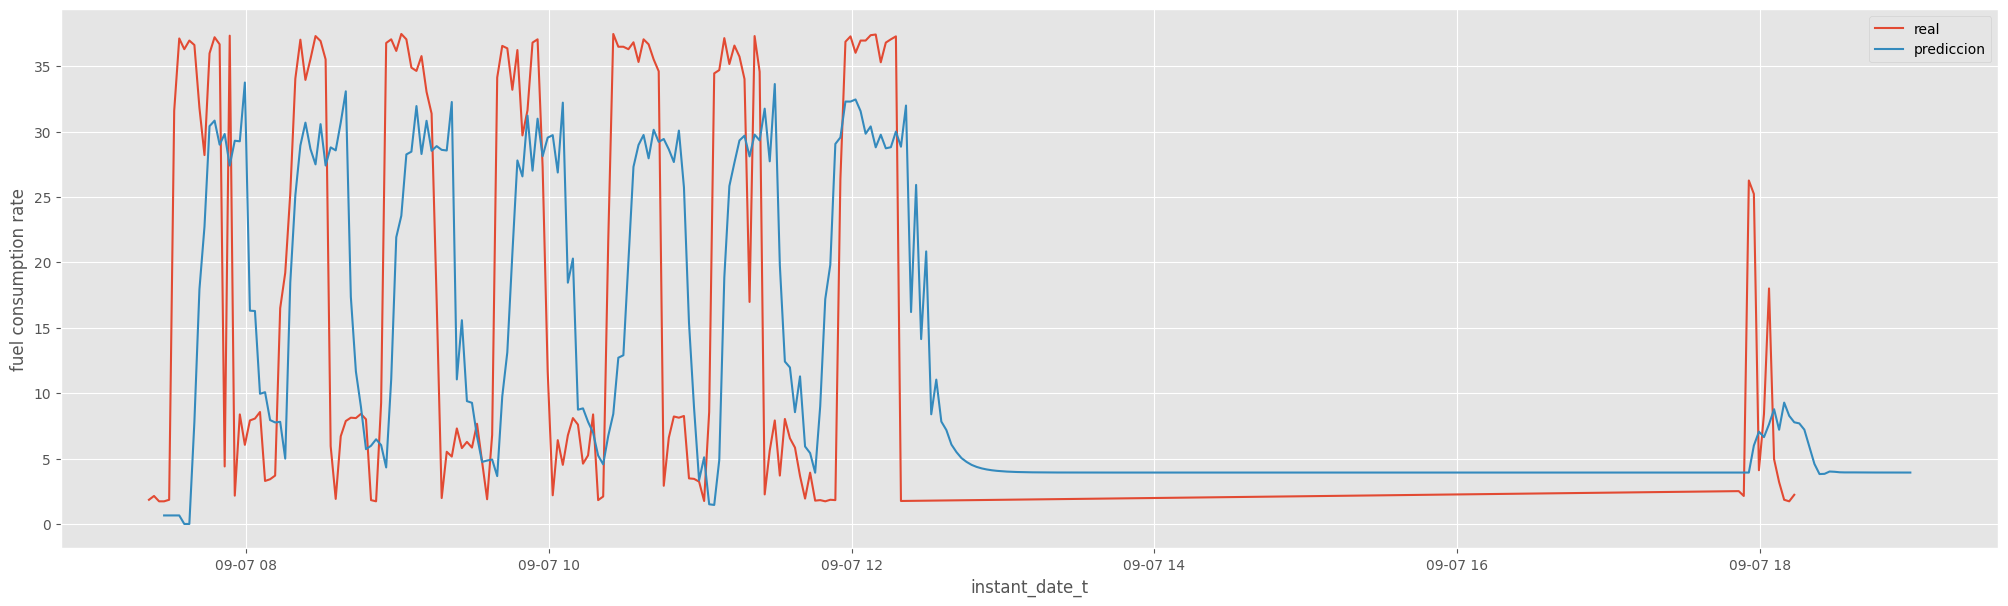

In [41]:
fig, ax = plt.subplots(1,1, figsize=(25,7))
sns.lineplot(data_real, x='instant_date_t', y='fuel consumption rate', label='real')
sns.lineplot(dataset_forecast, x='instant_date_t', y='fuel consumption rate', label='prediccion')

In [ ]:
# equip, df_recomend = GenerarRecomendacionV2(106, dataset_forecast, dataset_modelo, 1)

In [ ]:
equip_che1, df_recomend_che1 = GenerarRecomendacionV2(106, dataset_forecast, dataset_modelo, 1, 13)

Procesado y almacenado en el diccionario: df_0

Procesando el DataFrame df_0...
  Procesando bloque_1 con 45 filas...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━

In [91]:
df_recomend_bi17.head()

,instant_date_t,equipment,date,autolube pres,turbo in pres,thrttl lck,ground speed,trn shift time,z coor,eng oil pres alta rpm,eng oil pres ab,lo strg pres,pitch,rtf-ltf exhtemp,compr bk stat,rt imat,lt imat,ether sol cfg,throttl pos,ether injec st,des eng spd,air fltr,alternator st,ambient air temperature,atmospheric pressure,exh temp ltr,exh temp rtr,fela trigger,rt boost pres,sys voltage,haul distance,headlamp sw,mach slope,parkbk,retarder mode,lckup shift time,retrdr lev pos,lt r susp cyl,exh temp rtf,eng load,eng cool temp,exh temp ltf,lt r wheel spd,eng spd,lt f susp cyl,sec bk ped pos,sec str mtr st,svc bk ped pos,tcs install st,fuel fltr,trn chg flt byp,trn oil temp,rtf-ltf suspcyl,brk fltr plgd,brk temp,cycle p fela,cycle r fela,diff fltr,diff temp,fuel pres,hoist lvr duty,hoist lvr pos,hoist output st,rtr-ltr exhtemp,fuel temp,lvr duty cycle,max bias/sec,lt r brk temp,ltr-ltf brktemp,rt f susp cyl,rt r susp cyl,trn gear,rt r wheel spd,rtr-ltr suspcyl,tank fuel level,trn out spd,lt f brk temp,max pitch/sec,max rack/sec,rt f brk temp,payload data,payload status,raxl install st,rtf-ltf brktemp,rtr-ltr brktemp,rtr-rtf brktemp,serv brk acc pr,brake pump pressure,shift lvr pos,tkph f tires,tkph f warn,tkph r tires,tkph r warn,trac ctrl mode,trn chrg fltr,trn oil lvl,vims event list,vims snapshot,tc out temp,rt r brk temp,body pos,actual gear,truck payload,lt boost pres,gear,lon coor,speed gps,roll,direction,nro satellite,precision gps,lat coor,eq_id,x,y,z,bearing_t,speed_t,gear_t,pitch_t,roll_t,n_sat,tramosidsnew_t,id_trabaj_t,tempeje1_t,tempeje2_t,tempeje3_t,tempeje4_t,tempeje5_t,tempeje6_t,presllanta1_t,presllanta2_t,presllanta3_t,presllanta4_t,presllanta5_t,presllanta6_t,isload_t,tonelaje_t,marcha_t,latitude_t,longitud_t,precisiongps_t,direccion_t,combustibleint_t,frecuencia_t,templlanta1_t,templlanta2_t,templlanta3_t,templlanta4_t,templlanta5_t,templlanta6_t,bateriasensorllanta1_t,bateriasensorllanta2_t,bateriasensorllanta3_t,bateriasensorllanta4_t,bateriasensorllanta5_t,bateriasensorllanta6_t,segment_angle_t,fuel_rate_t,id_equipo,nombre,idestado,id_ciclo,ruta_cargado,ruta_descargado,status truck,fuel consumption,diff_x,diff_y,diff_z,dist_xy,dist_xyz,direccion,pendiente,brake_value,year,mes,dia,hora,minuto,id_ciclo_acarreo,efhcargado,efhvacio,coorxcarg,coorycarg,coorzcarg,coorxdesc,coorydesc,coorzdesc,fuel consumption rate,Tipo
0,2024-09-07 07:21:32,FC80,2024-09-07 07:21:32,0.0,98.0,0.0,0.199115,0.62,480.000000,256.5,353.5,0.0,0.82,0.0,240.0,0.0,0.0,2.0,0.0,0.0,800.0,0.0,0.0,0.0,97.5,0.0,0.0,0.0,0.0,27.0,3.00,1.0,-28.700001,32767.0,1.0,3.02,-0.15,2801.0,0.0,3.0,82.0,0.0,0.0,802.5,4019.0,0.0,0.0,1.0,17.0,0.0,331.0,84.0,-296.0,331.0,80.0,0.0,0.0,0.0,0.0,563.0,33.5,-15615.0,0.0,0.0,41.790001,10.0,0.0,0.0,0.0,3723.0,788.0,32.0,0.0,-1999.0,40.0,0.0,0.0,0.0,0.0,0.0,90.0,5.0,0.0,0.0,0.0,0.0,0.0,1.000000,40.0,0.0,0.0,0.0,0.0,240.0,144.0,-16.0,74.0,100.0,85.0,0.0,0.0,0.0,0.0,0.0,1.0,-75.110001,0.01,-1.95,314.570007,11.0,4.30,-15.2,106.0,57308.890625,67337.796875,480.000000,315.0,0.03,0.0,82.0,-197.0,11.0,-1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,-15204690.0,-75112600.0,430.0,315.0,76.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-157.0,70.0,106.0,FC80,2084907.0,4208060.0,-1.0,-1.0,2.0,0.0,0.820312,-0.632812,2.600006,1.036033,2.798820,127.647621,68.274033,0,2024,9,7,7,21,4208060.0,931500.0,746111.0,None,None,None,56135.63,66189.75,832.0,0.0,Recomendacion
1,2024-09-07 07:23:32,FC80,2024-09-07 07:23:32,0.0,98.0,0.0,0.000000,0.62,475.500000,258.5,356.0,0.0,0.81,0.0,240.0,0.0,0.0,2.0,0.0,0.0,800.0,0.0,0.0,0.0,97.5,0.0,0.0,0.0,0.0,27.0,3.00,1.0,-26.500000,32767.0,1.0,3.02,-0.15,2794.0,0.0,4.0,82.0,0.0,0.0,803.0,3999.0,0.0,0.0,1.0,17.0,0.0,331.0,84.0,-283.0,331.0,79.0,0.0,0.0,0.0,0.0,562.5,33.5,-15871.0,0.0,0.0,41.790001,10.0,0.0,0.0,0.0,3723.0,795.0,32.0,0.0,-1993.0,40.0,0.0,0.0,0.0,0.0,0.0,90.0,5.0,0.0,0.0,0.0,0.0,0.0,0.000488,40.0,0.0,0.0,0.0,0.0,240.0,144.0,-16.0,74.0,100.0,85.0,0.0,0.0,0.0,0.0

In [79]:
df_recomend_bi16.head()

,instant_date_t,equipment,date,autolube pres,turbo in pres,thrttl lck,ground speed,trn shift time,z coor,eng oil pres alta rpm,eng oil pres ab,lo strg pres,pitch,rtf-ltf exhtemp,compr bk stat,rt imat,lt imat,ether sol cfg,throttl pos,ether injec st,des eng spd,air fltr,alternator st,ambient air temperature,atmospheric pressure,exh temp ltr,exh temp rtr,fela trigger,rt boost pres,sys voltage,haul distance,headlamp sw,mach slope,parkbk,retarder mode,lckup shift time,retrdr lev pos,lt r susp cyl,exh temp rtf,eng load,eng cool temp,exh temp ltf,lt r wheel spd,eng spd,lt f susp cyl,sec bk ped pos,sec str mtr st,svc bk ped pos,tcs install st,fuel fltr,trn chg flt byp,trn oil temp,rtf-ltf suspcyl,brk fltr plgd,brk temp,cycle p fela,cycle r fela,diff fltr,diff temp,fuel pres,hoist lvr duty,hoist lvr pos,hoist output st,rtr-ltr exhtemp,fuel temp,lvr duty cycle,max bias/sec,lt r brk temp,ltr-ltf brktemp,rt f susp cyl,rt r susp cyl,trn gear,rt r wheel spd,rtr-ltr suspcyl,tank fuel level,trn out spd,lt f brk temp,max pitch/sec,max rack/sec,rt f brk temp,payload data,payload status,raxl install st,rtf-ltf brktemp,rtr-ltr brktemp,rtr-rtf brktemp,serv brk acc pr,brake pump pressure,shift lvr pos,tkph f tires,tkph f warn,tkph r tires,tkph r warn,trac ctrl mode,trn chrg fltr,trn oil lvl,vims event list,vims snapshot,tc out temp,rt r brk temp,body pos,actual gear,truck payload,lt boost pres,gear,lon coor,speed gps,roll,direction,nro satellite,precision gps,lat coor,eq_id,x,y,z,bearing_t,speed_t,gear_t,pitch_t,roll_t,n_sat,tramosidsnew_t,id_trabaj_t,tempeje1_t,tempeje2_t,tempeje3_t,tempeje4_t,tempeje5_t,tempeje6_t,presllanta1_t,presllanta2_t,presllanta3_t,presllanta4_t,presllanta5_t,presllanta6_t,isload_t,tonelaje_t,marcha_t,latitude_t,longitud_t,precisiongps_t,direccion_t,combustibleint_t,frecuencia_t,templlanta1_t,templlanta2_t,templlanta3_t,templlanta4_t,templlanta5_t,templlanta6_t,bateriasensorllanta1_t,bateriasensorllanta2_t,bateriasensorllanta3_t,bateriasensorllanta4_t,bateriasensorllanta5_t,bateriasensorllanta6_t,segment_angle_t,fuel_rate_t,id_equipo,nombre,idestado,id_ciclo,ruta_cargado,ruta_descargado,status truck,fuel consumption,diff_x,diff_y,diff_z,dist_xy,dist_xyz,direccion,pendiente,brake_value,year,mes,dia,hora,minuto,id_ciclo_acarreo,efhcargado,efhvacio,coorxcarg,coorycarg,coorzcarg,coorxdesc,coorydesc,coorzdesc,fuel consumption rate,Tipo
0,2024-09-07 07:21:32,FC80,2024-09-07 07:21:32,0.0,98.0,0.0,0.199115,0.62,480.000000,256.5,353.5,0.0,0.82,0.0,240.0,0.0,0.0,2.0,0.0,0.0,800.0,0.0,0.0,0.0,97.5,0.0,0.0,0.0,0.0,27.0,3.00,1.0,-28.700001,32767.0,1.0,3.02,-0.15,2801.0,0.0,3.0,82.0,0.0,0.0,802.5,4019.0,0.0,0.0,1.0,17.0,0.0,331.0,84.0,-296.0,331.0,80.0,0.0,0.0,0.0,0.0,563.0,33.5,-15615.0,0.0,0.0,41.790001,10.0,0.0,0.0,0.0,3723.0,788.0,32.0,0.0,-1999.0,40.0,0.0,0.0,0.0,0.0,0.0,90.0,5.0,0.0,0.0,0.0,0.0,0.0,1.000000,40.0,0.0,0.0,0.0,0.0,240.0,144.0,-16.0,74.0,100.0,85.0,0.0,0.0,0.0,0.0,0.0,0.666667,-75.110001,0.01,-1.95,314.570007,11.0,4.30,-15.2,106.0,57308.890625,67337.796875,480.000000,315.0,0.03,0.0,82.0,-197.0,11.0,-1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,-15204690.0,-75112600.0,430.0,315.0,76.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-157.0,70.0,106.0,FC80,2084907.0,4208060.0,-1.0,-1.0,2.0,0.0,0.820312,-0.632812,2.600006,1.036033,2.798820,127.647621,68.274033,0,2024,9,7,7,21,4208060.0,931500.0,746111.0,None,None,None,56135.63,66189.75,832.0,0.0,Recomendacion
1,2024-09-07 07:23:32,FC80,2024-09-07 07:23:32,0.0,98.0,0.0,0.000000,0.62,475.500000,258.5,356.0,0.0,0.81,0.0,240.0,0.0,0.0,2.0,0.0,0.0,800.0,0.0,0.0,0.0,97.5,0.0,0.0,0.0,0.0,27.0,3.00,1.0,-26.500000,32767.0,1.0,3.02,-0.15,2794.0,0.0,4.0,82.0,0.0,0.0,803.0,3999.0,0.0,0.0,1.0,17.0,0.0,331.0,84.0,-283.0,331.0,79.0,0.0,0.0,0.0,0.0,562.5,33.5,-15871.0,0.0,0.0,41.790001,10.0,0.0,0.0,0.0,3723.0,795.0,32.0,0.0,-1993.0,40.0,0.0,0.0,0.0,0.0,0.0,90.0,5.0,0.0,0.0,0.0,0.0,0.0,0.000488,40.0,0.0,0.0,0.0,0.0,240.0,144.0,-16.0,74.0,100.0,85.0,0.0,0.0,0.

<Axes: xlabel='instant_date_t', ylabel='fuel consumption rate'>

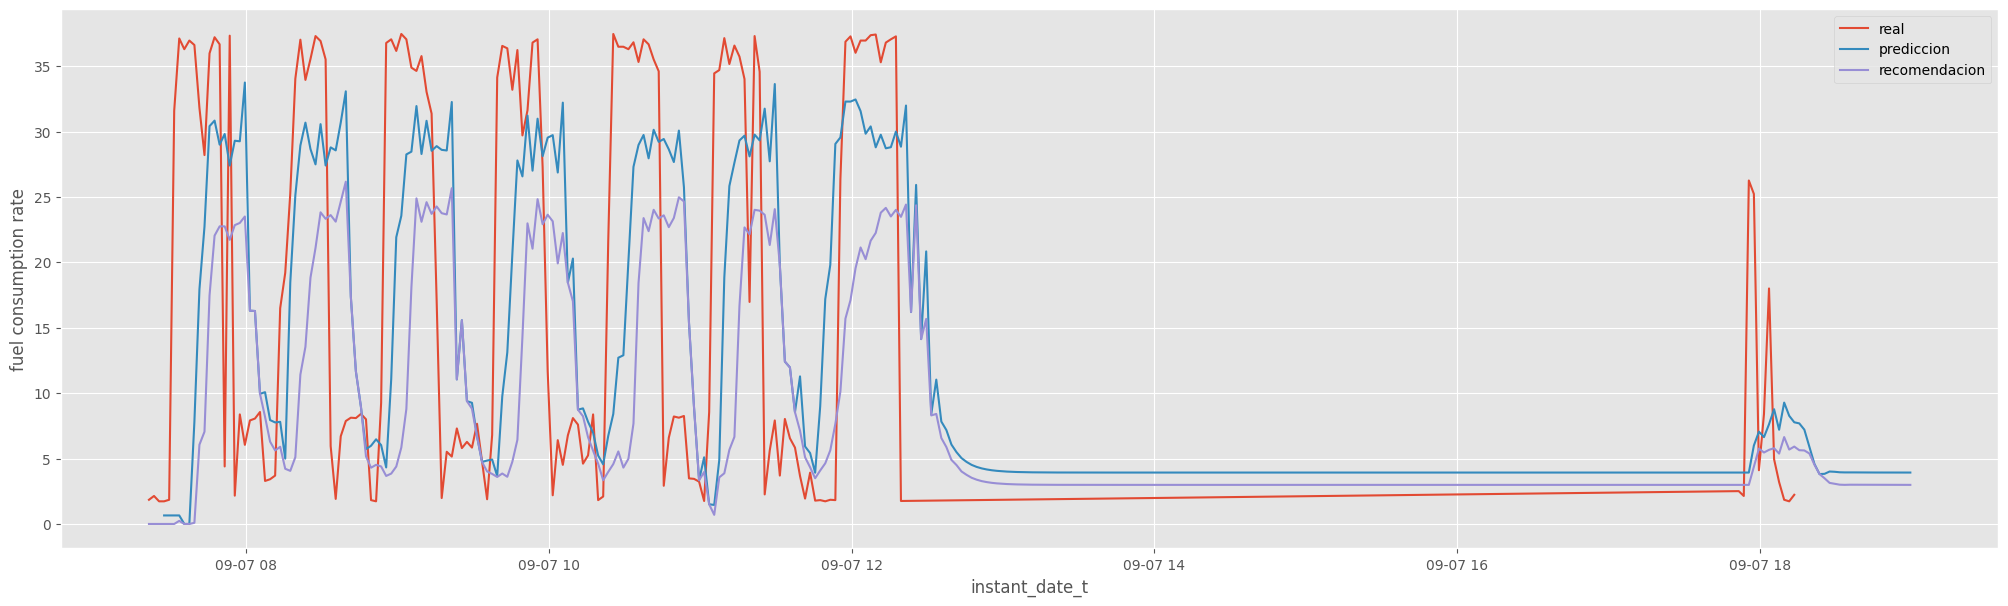

In [55]:
fig, ax = plt.subplots(1,1, figsize=(25,7))
sns.lineplot(data_real, x='instant_date_t', y='fuel consumption rate', label='real')
sns.lineplot(dataset_forecast, x='instant_date_t', y='fuel consumption rate', label='prediccion')
sns.lineplot(df_recomend_b14, x='instant_date_t', y='fuel consumption rate', label='recomendacion')

<Axes: xlabel='instant_date_t', ylabel='fuel consumption rate'>

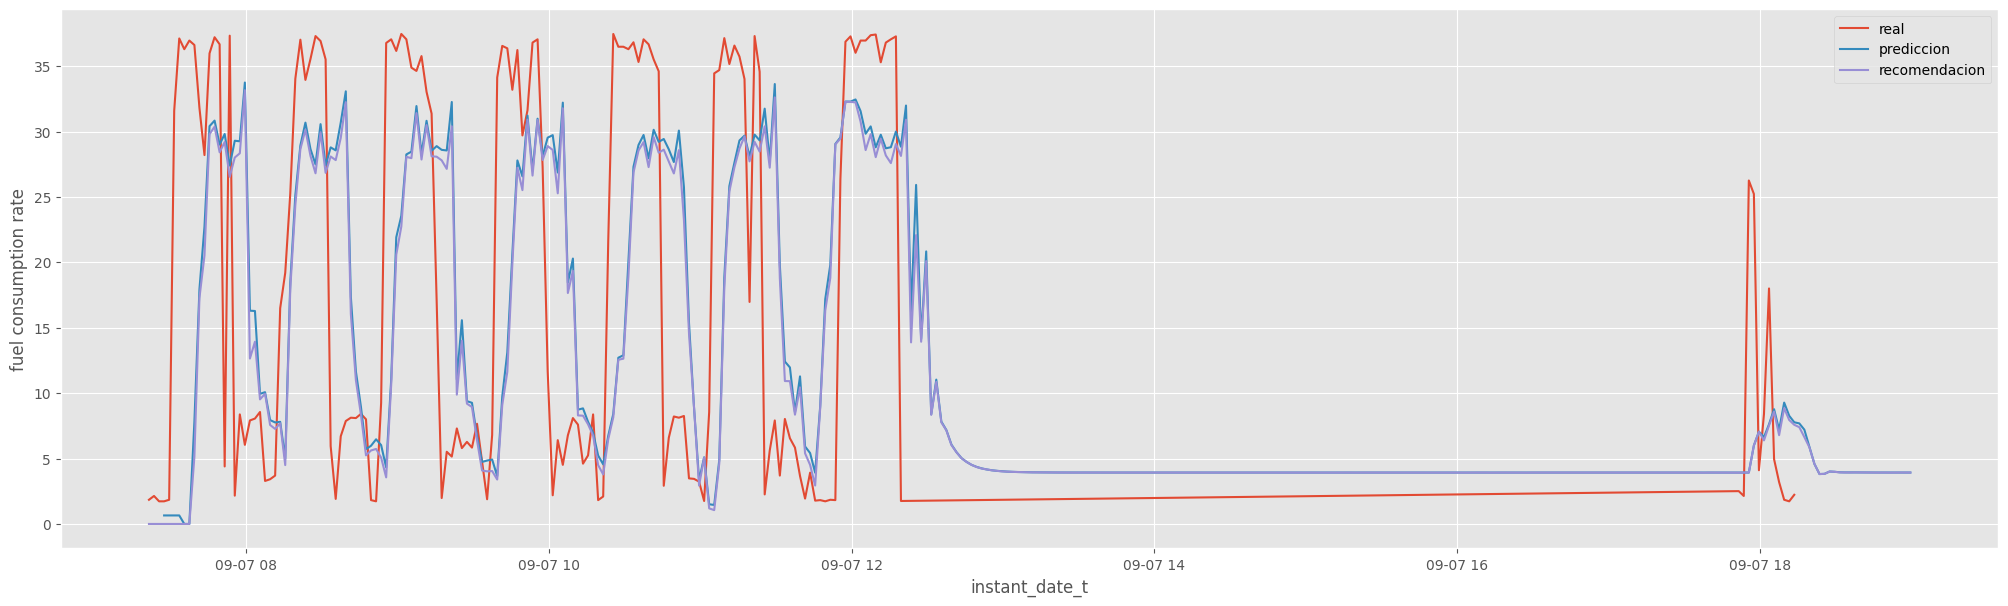

In [80]:
fig, ax = plt.subplots(1,1, figsize=(25,7))
sns.lineplot(data_real, x='instant_date_t', y='fuel consumption rate', label='real')
sns.lineplot(dataset_forecast, x='instant_date_t', y='fuel consumption rate', label='prediccion')
sns.lineplot(df_recomend_bi16, x='instant_date_t', y='fuel consumption rate', label='recomendacion')

<Axes: xlabel='instant_date_t', ylabel='fuel consumption rate'>

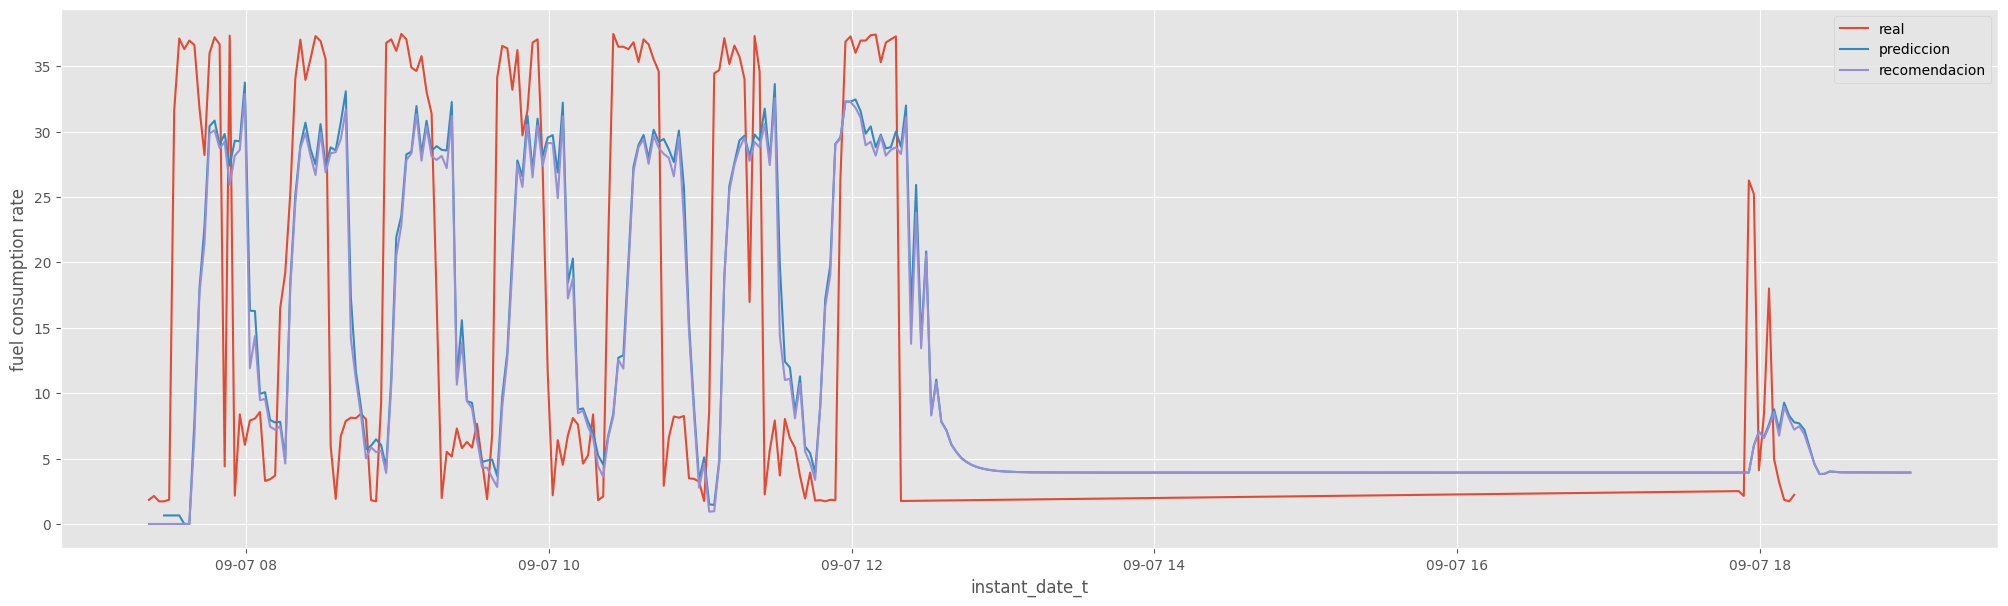

In [92]:
fig, ax = plt.subplots(1,1, figsize=(25,7))
sns.lineplot(data_real, x='instant_date_t', y='fuel consumption rate', label='real')
sns.lineplot(dataset_forecast, x='instant_date_t', y='fuel consumption rate', label='prediccion')
sns.lineplot(df_recomend_bi17, x='instant_date_t', y='fuel consumption rate', label='recomendacion')

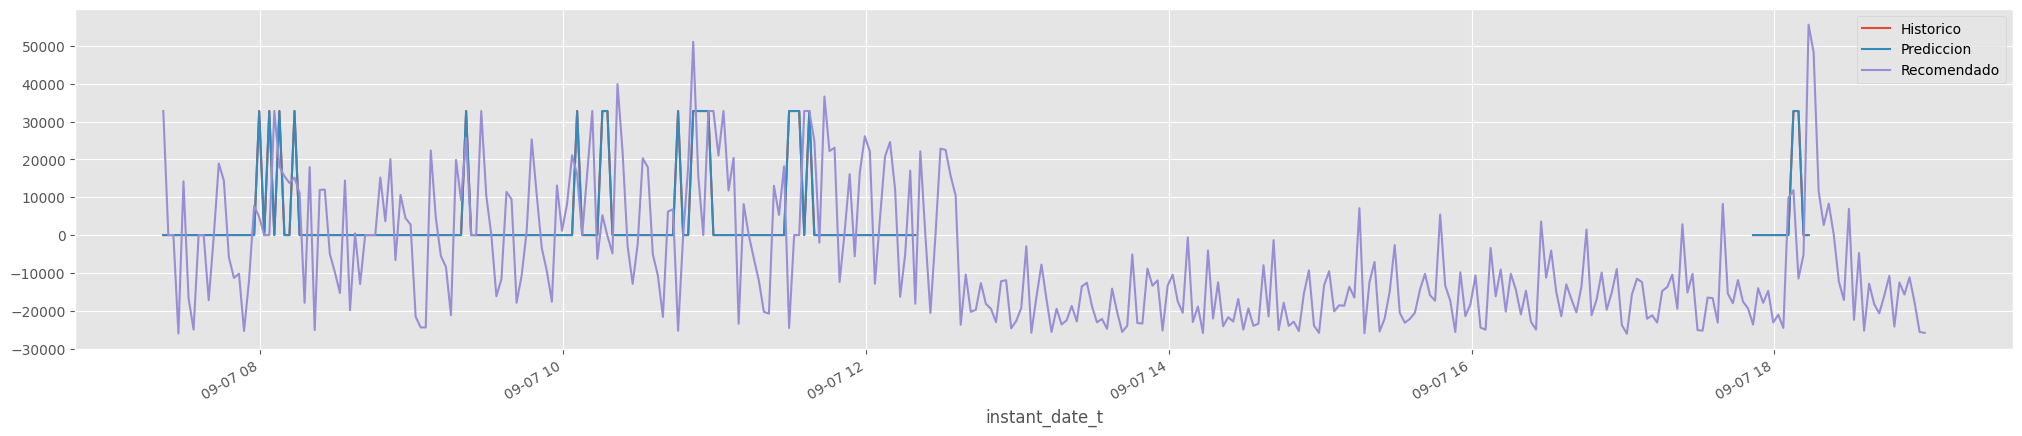

In [57]:
### modelo con cambios
plt.figure(figsize=(25,5))
data_real.set_index('instant_date_t')['brake pump pressure'].plot(label='Historico')
dataset_forecast.set_index('instant_date_t')['brake pump pressure'].plot(label='Prediccion')
df_recomend_b14.set_index('instant_date_t')['brake pump pressure'].plot(label='Recomendado')
plt.legend()

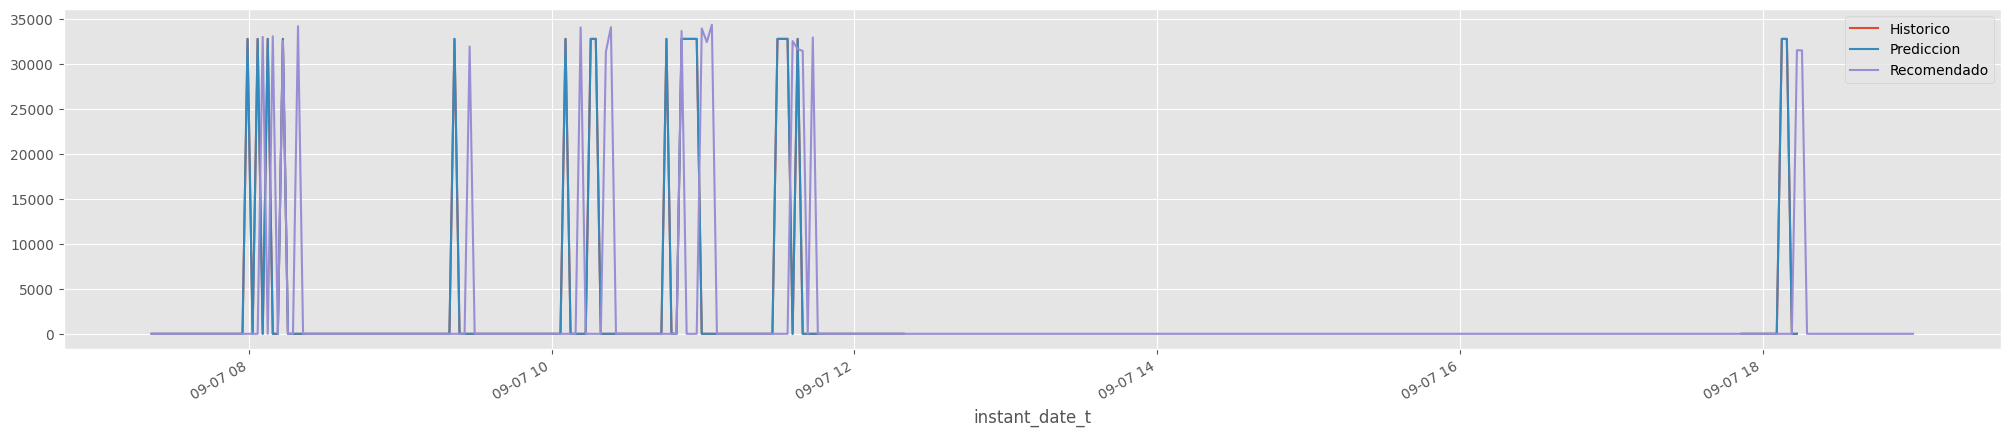

In [81]:
### modelo con cambios
plt.figure(figsize=(25,5))
data_real.set_index('instant_date_t')['brake pump pressure'].plot(label='Historico')
dataset_forecast.set_index('instant_date_t')['brake pump pressure'].plot(label='Prediccion')
df_recomend_bi16.set_index('instant_date_t')['brake pump pressure'].plot(label='Recomendado')
plt.legend()

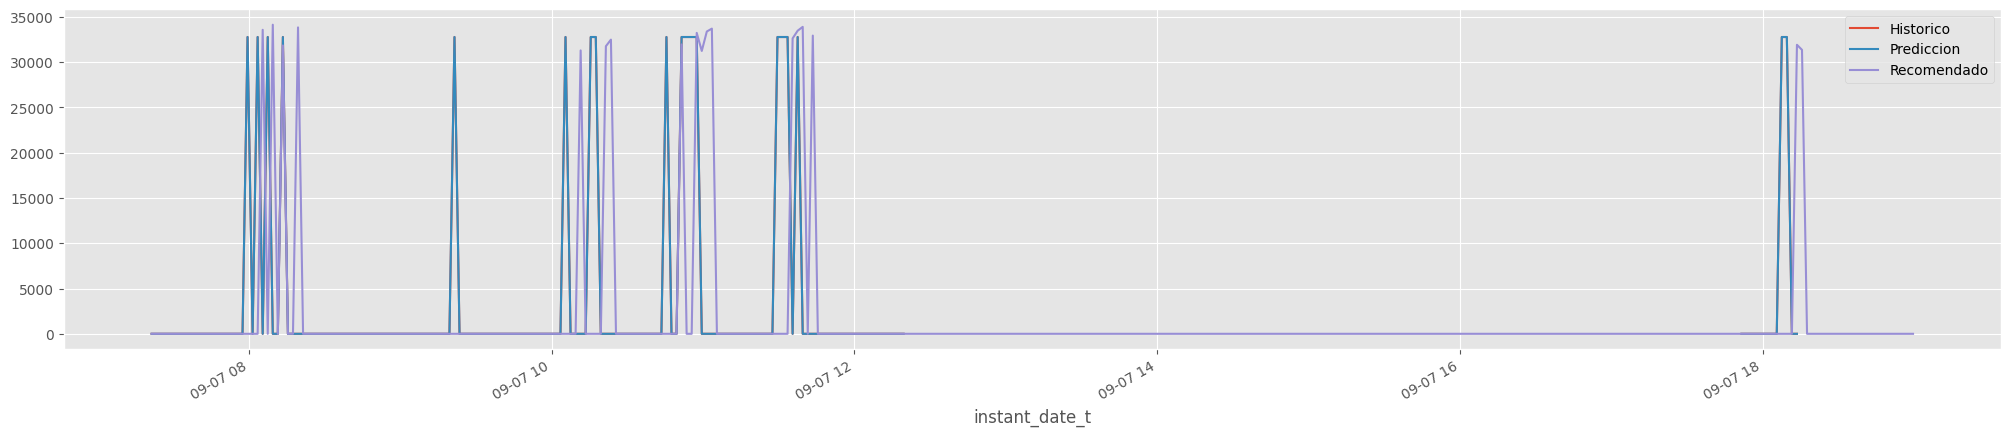

In [93]:
### modelo con cambios
plt.figure(figsize=(25,5))
data_real.set_index('instant_date_t')['brake pump pressure'].plot(label='Historico')
dataset_forecast.set_index('instant_date_t')['brake pump pressure'].plot(label='Prediccion')
df_recomend_bi17.set_index('instant_date_t')['brake pump pressure'].plot(label='Recomendado')
plt.legend()

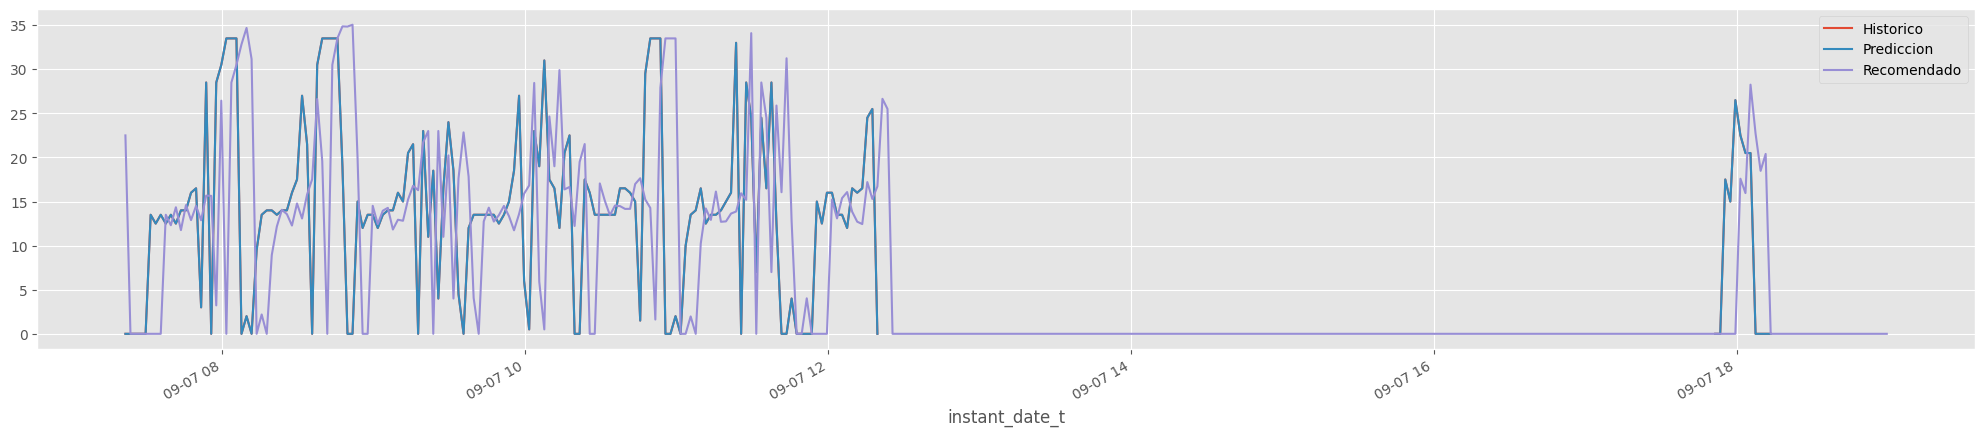

In [58]:
### modelo con cambios
plt.figure(figsize=(25,5))
data_real.set_index('instant_date_t')['ground speed'].plot(label='Historico')
dataset_forecast.set_index('instant_date_t')['ground speed'].plot(label='Prediccion')
df_recomend_b14.set_index('instant_date_t')['ground speed'].plot(label='Recomendado')
plt.legend()

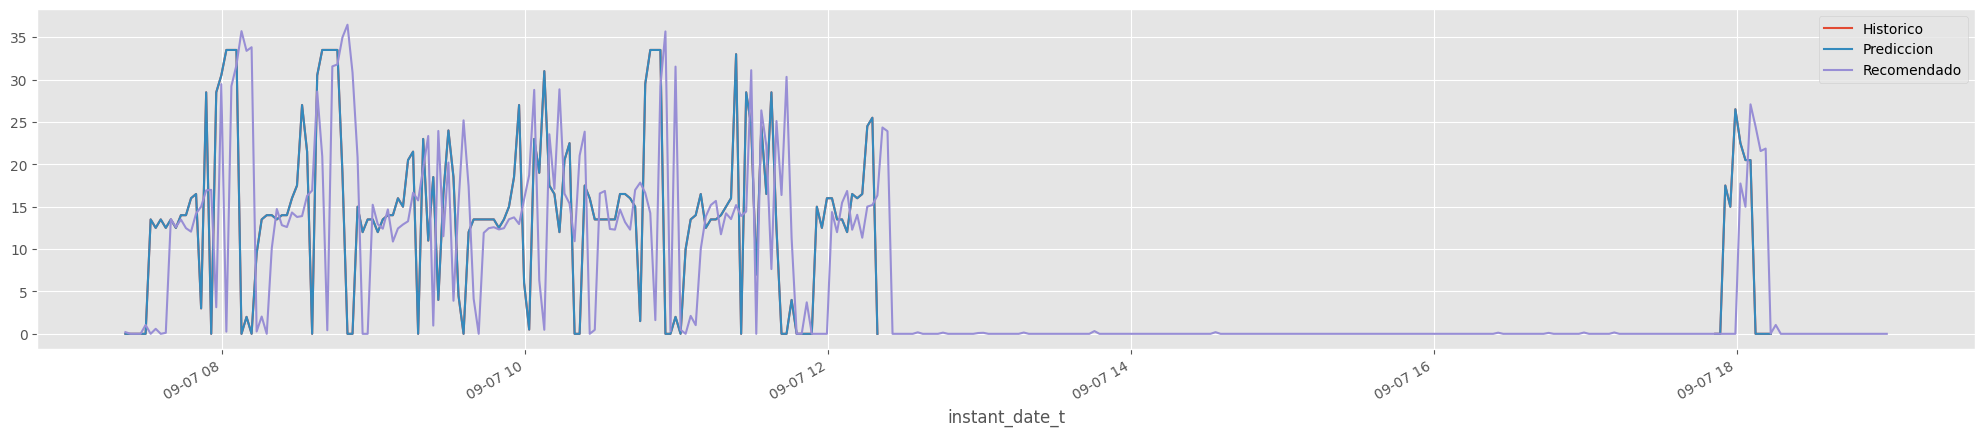

In [82]:
### modelo con cambios
plt.figure(figsize=(25,5))
data_real.set_index('instant_date_t')['ground speed'].plot(label='Historico')
dataset_forecast.set_index('instant_date_t')['ground speed'].plot(label='Prediccion')
df_recomend_bi16.set_index('instant_date_t')['ground speed'].plot(label='Recomendado')
plt.legend()

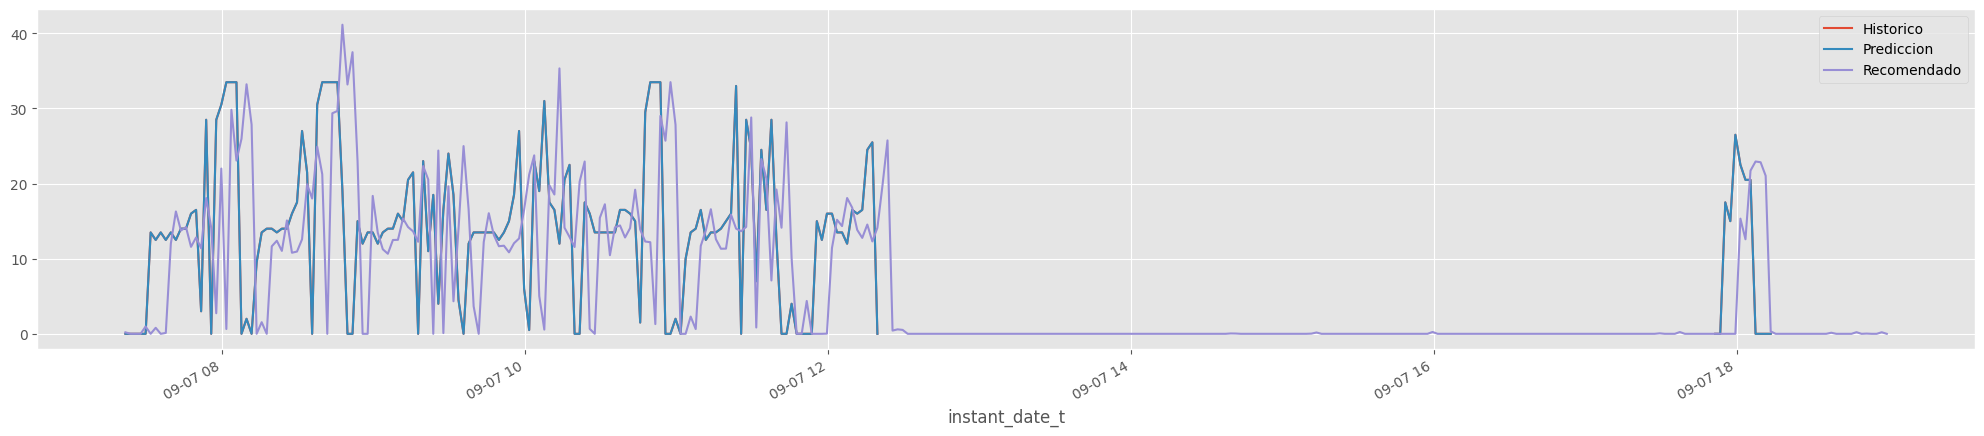

In [94]:
### modelo con cambios
plt.figure(figsize=(25,5))
data_real.set_index('instant_date_t')['ground speed'].plot(label='Historico')
dataset_forecast.set_index('instant_date_t')['ground speed'].plot(label='Prediccion')
df_recomend_bi17.set_index('instant_date_t')['ground speed'].plot(label='Recomendado')
plt.legend()

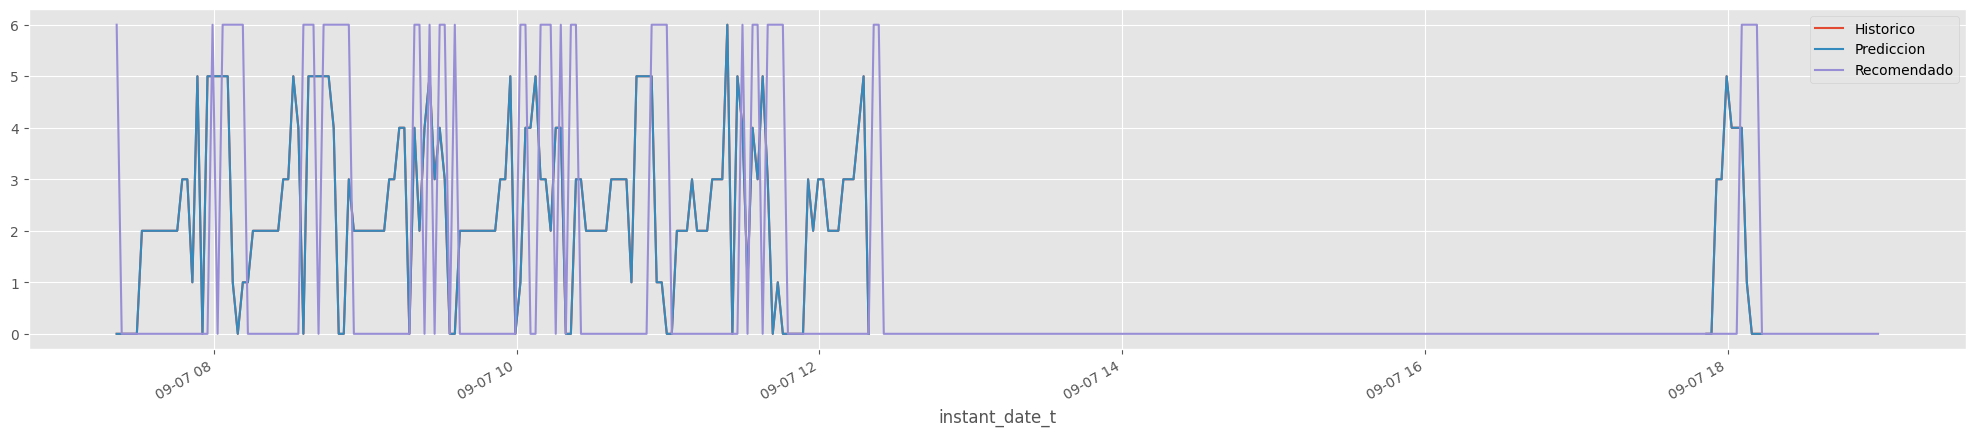

In [59]:
### modelo con cambios
plt.figure(figsize=(25,5))
data_real.set_index('instant_date_t')['gear'].plot(label='Historico')
dataset_forecast.set_index('instant_date_t')['gear'].plot(label='Prediccion')
df_recomend_b14.set_index('instant_date_t')['gear'].plot(label='Recomendado')
plt.legend()

In [87]:
# df_recomend_bi16['gear'].unique()

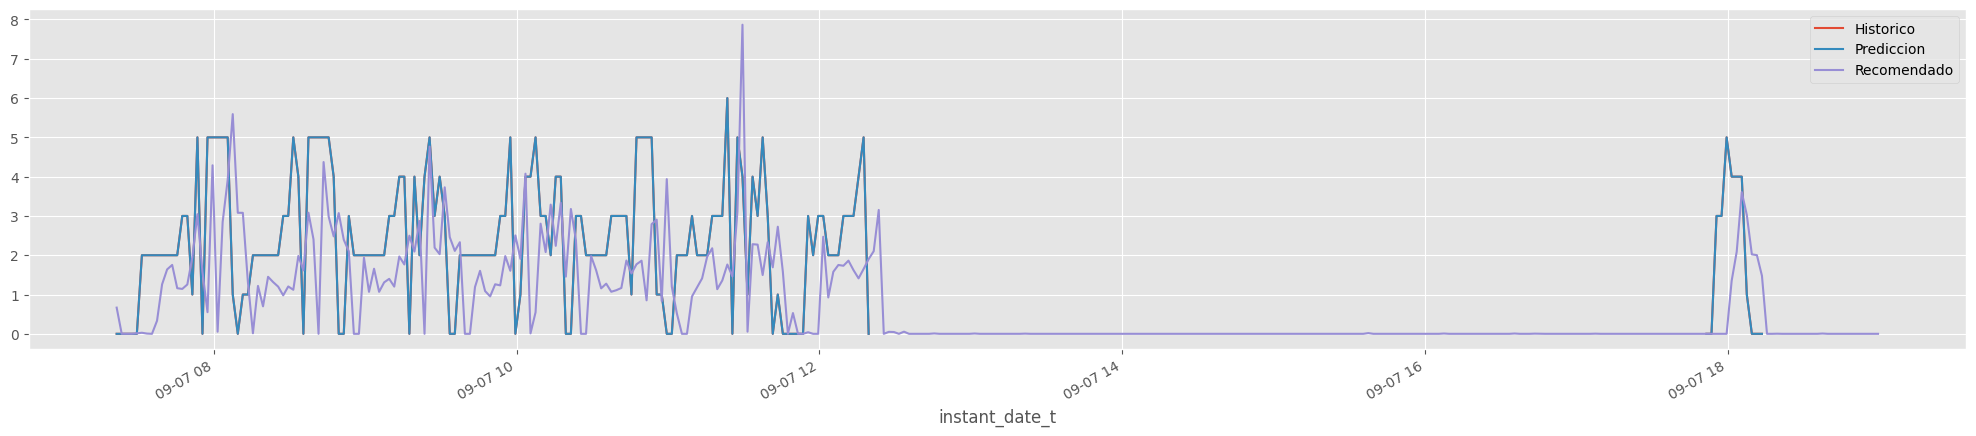

In [85]:
### modelo con cambios
plt.figure(figsize=(25,5))
data_real.set_index('instant_date_t')['gear'].plot(label='Historico')
dataset_forecast.set_index('instant_date_t')['gear'].plot(label='Prediccion')
df_recomend_bi16.set_index('instant_date_t')['gear'].plot(label='Recomendado')
plt.legend()

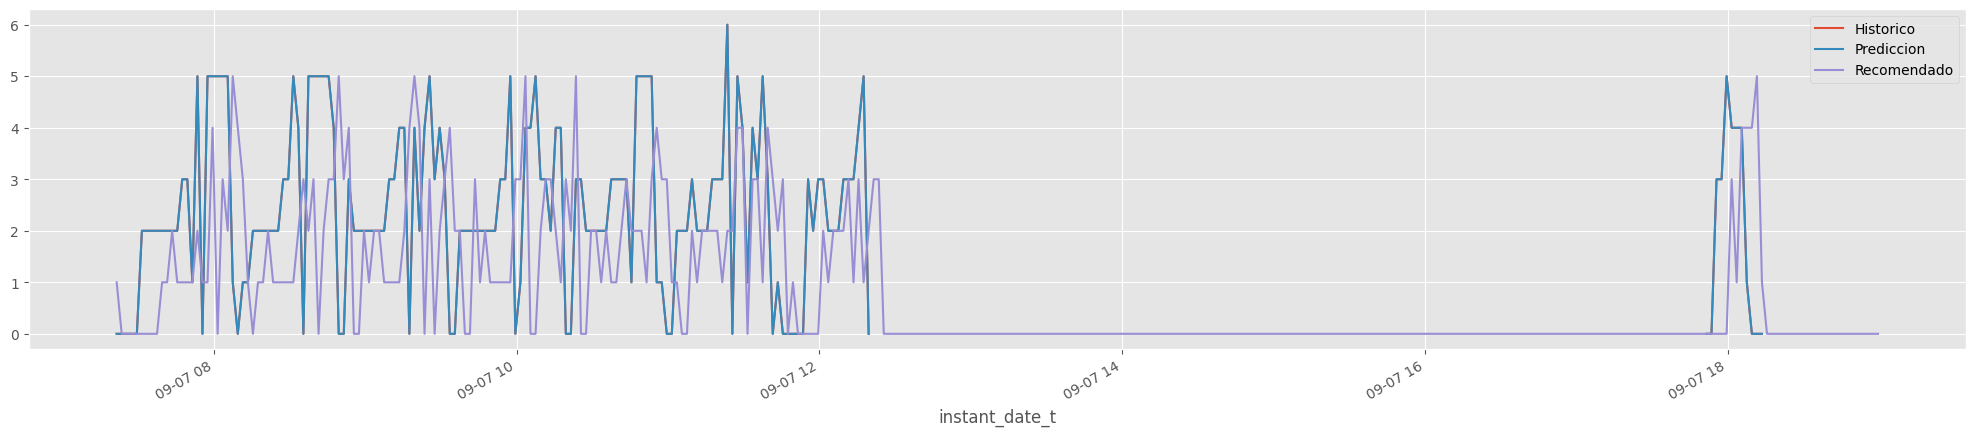

In [95]:
### modelo con cambios
plt.figure(figsize=(25,5))
data_real.set_index('instant_date_t')['gear'].plot(label='Historico')
dataset_forecast.set_index('instant_date_t')['gear'].plot(label='Prediccion')
df_recomend_bi17.set_index('instant_date_t')['gear'].plot(label='Recomendado')
plt.legend()

In [70]:
def desescalar_por_variables_max_min(dataframe_normalizado, variables_a_desescalar, minimos, maximos):
        """
        Desescala solo las variables especificadas en un dataframe utilizando el método inverso de Min-Max.
        Args:
            dataframe_normalizado: El dataframe con valores normalizados.
            variables_a_desescalar: Lista de nombres de las variables a desescalar.
            minimos: Diccionario con el valor mínimo de cada variable.
            maximos: Diccionario con el valor máximo de cada variable.
        Returns:
            DataFrame desescalado con valores originales.
        """
        dataframe_desescalado = dataframe_normalizado.copy()
        for columna in variables_a_desescalar:
            if columna in minimos and columna in maximos:
                dataframe_desescalado[columna] = dataframe_normalizado[columna] * (maximos[columna] - minimos[columna]) + minimos[columna]
        return dataframe_desescalado

In [73]:
variables_a_desescalar = list(minimos.keys())
variables_a_desescalar

['roll',
 'pitch',
 'ground speed',
 'tonelaje_t',
 'gear',
 'x',
 'y',
 'z',
 'efhcargado',
 'efhvacio',
 'atmospheric pressure',
 'brake pump pressure']

In [74]:
dataframe_desescalado_df_recomend_b8 = desescalar_por_variables_max_min(
                df_recomend_b8,
                variables_a_desescalar,
                minimos,
                maximos
            )

In [75]:
dataframe_desescalado_df_recomend_b8.head()

,instant_date_t,equipment,date,autolube pres,turbo in pres,thrttl lck,ground speed,trn shift time,z coor,eng oil pres alta rpm,eng oil pres ab,lo strg pres,pitch,rtf-ltf exhtemp,compr bk stat,rt imat,lt imat,ether sol cfg,throttl pos,ether injec st,des eng spd,air fltr,alternator st,ambient air temperature,atmospheric pressure,exh temp ltr,exh temp rtr,fela trigger,rt boost pres,sys voltage,haul distance,headlamp sw,mach slope,parkbk,retarder mode,lckup shift time,retrdr lev pos,lt r susp cyl,exh temp rtf,eng load,eng cool temp,exh temp ltf,lt r wheel spd,eng spd,lt f susp cyl,sec bk ped pos,sec str mtr st,svc bk ped pos,tcs install st,fuel fltr,trn chg flt byp,trn oil temp,rtf-ltf suspcyl,brk fltr plgd,brk temp,cycle p fela,cycle r fela,diff fltr,diff temp,fuel pres,hoist lvr duty,hoist lvr pos,hoist output st,rtr-ltr exhtemp,fuel temp,lvr duty cycle,max bias/sec,lt r brk temp,ltr-ltf brktemp,rt f susp cyl,rt r susp cyl,trn gear,rt r wheel spd,rtr-ltr suspcyl,tank fuel level,trn out spd,lt f brk temp,max pitch/sec,max rack/sec,rt f brk temp,payload data,payload status,raxl install st,rtf-ltf brktemp,rtr-ltr brktemp,rtr-rtf brktemp,serv brk acc pr,brake pump pressure,shift lvr pos,tkph f tires,tkph f warn,tkph r tires,tkph r warn,trac ctrl mode,trn chrg fltr,trn oil lvl,vims event list,vims snapshot,tc out temp,rt r brk temp,body pos,actual gear,truck payload,lt boost pres,gear,lon coor,speed gps,roll,direction,nro satellite,precision gps,lat coor,eq_id,x,y,z,bearing_t,speed_t,gear_t,pitch_t,roll_t,n_sat,tramosidsnew_t,id_trabaj_t,tempeje1_t,tempeje2_t,tempeje3_t,tempeje4_t,tempeje5_t,tempeje6_t,presllanta1_t,presllanta2_t,presllanta3_t,presllanta4_t,presllanta5_t,presllanta6_t,isload_t,tonelaje_t,marcha_t,latitude_t,longitud_t,precisiongps_t,direccion_t,combustibleint_t,frecuencia_t,templlanta1_t,templlanta2_t,templlanta3_t,templlanta4_t,templlanta5_t,templlanta6_t,bateriasensorllanta1_t,bateriasensorllanta2_t,bateriasensorllanta3_t,bateriasensorllanta4_t,bateriasensorllanta5_t,bateriasensorllanta6_t,segment_angle_t,fuel_rate_t,id_equipo,nombre,idestado,id_ciclo,ruta_cargado,ruta_descargado,status truck,fuel consumption,diff_x,diff_y,diff_z,dist_xy,dist_xyz,direccion,pendiente,year,mes,dia,hora,minuto,id_ciclo_acarreo,efhcargado,efhvacio,coorxcarg,coorycarg,coorzcarg,coorxdesc,coorydesc,coorzdesc,fuel consumption rate,Tipo
0,2024-09-07 07:21:32,FC80,2024-09-07 07:21:32,0.0,98.0,0.0,22.499999,0.62,480.000000,256.5,353.5,0.0,-0.396,0.0,240.0,0.0,0.0,2.0,0.0,0.0,800.0,0.0,0.0,0.0,1590465.75,0.0,0.0,0.0,0.0,27.0,3.00,1.0,-28.700001,32767.0,1.0,3.02,-0.15,2801.0,0.0,3.0,82.0,0.0,0.0,802.5,4019.0,0.0,0.0,1.0,17.0,0.0,331.0,84.0,-296.0,331.0,80.0,0.0,0.0,0.0,0.0,563.0,33.5,-15615.0,0.0,0.0,41.790001,10.0,0.0,0.0,0.0,3723.0,788.0,32.0,0.0,-1999.0,40.0,0.0,0.0,0.0,0.0,0.0,90.0,5.0,0.0,0.0,0.0,0.0,0.0,3.276700e+04,40.0,0.0,0.0,0.0,0.0,240.0,144.0,-16.0,74.0,100.0,85.0,0.0,0.0,0.0,0.0,0.0,6.0,-75.110001,0.01,-3.3540,314.570007,11.0,4.30,-15.2,106.0,3.495479e+09,4.728963e+09,470832.00000,315.0,0.03,0.0,82.0,-197.0,11.0,-1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,-15204690.0,-75112600.0,430.0,315.0,76.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-157.0,70.0,106.0,FC80,2084907.0,4208060.0,-1.0,-1.0,2.0,0.0,0.820312,-0.632812,2.600006,1.036033,2.798820,127.647614,68.274033,2024,9,7,7,21,4208060.0,3.737980e+12,3.889965e+14,None,None,None,56135.63,66189.75,832.0,0.0,Recomendacion
1,2024-09-07 07:23:32,FC80,2024-09-07 07:23:32,0.0,98.0,0.0,0.000000,0.62,475.500000,258.5,356.0,0.0,-0.418,0.0,240.0,0.0,0.0,2.0,0.0,0.0,800.0,0.0,0.0,0.0,1590465.75,0.0,0.0,0.0,0.0,27.0,3.00,1.0,-26.500000,32767.0,1.0,3.02,-0.15,2794.0,0.0,4.0,82.0,0.0,0.0,803.0,3999.0,0.0,0.0,1.0,17.0,0.0,331.0,84.0,-283.0,331.0,79.0,0.0,0.0,0.0,0.0,562.5,33.5,-15871.0,0.0,0.0,41.790001,10.0,0.0,0.0,0.0,3723.0,795.0,32.0,0.0,-1993.0,40.0,0.0,0.0,0.0,0.0,0.0,90.0,5.0,0.0,0.0,0.0,0.0,0.0,4.636822e-07,40.0,0.0,0.0,0.0,0.0,240.0,144.0,-16.0,74.0,100

In [ ]:
plt.figure(figsize=(25,5))
data_hist.set_index('instant_date_t')['fuel consumption rate'].plot(label='Historico')
df_predic.set_index('instant_date_t')['fuel consumption rate(target)'].plot(label='Prediccion')
df_recomend.set_index('instant_date_t')['fuel consumption rate'].plot(label='Recomendado')
plt.legend()

In [ ]:
df_predic[['fuel consumption rate(lag1)', 'fuel consumption rate(target)']]

In [ ]:
data_hist['fuel consumption'].sum()

In [ ]:
df_predic['fuel consumption'].sum()

In [ ]:
df_recomend['fuel consumption'].sum()

In [ ]:
df_predic['fuel consumption'].sum() - df_recomend['fuel consumption'].sum()